In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.shape

(569, 33)

In [6]:
df.size

18777

In [8]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [9]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
df['diagnosis']=df['diagnosis'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

In [15]:
df.drop(columns='id',inplace=True)

In [16]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572               

In [17]:
df['Unnamed: 32'].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
df.drop(columns='Unnamed: 32',inplace=True)

In [19]:
df.shape

(569, 31)

In [20]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# univarient analysis

In [21]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [22]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [23]:
df['diagnosis'].unique()

['M', 'B']
Categories (2, object): ['B', 'M']

In [24]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [25]:
df['diagnosis']=df['diagnosis'].apply(lambda x:'dangerous' if x=='M' else 'safe')

In [26]:
df['diagnosis'].value_counts()

diagnosis
safe         357
dangerous    212
Name: count, dtype: int64

### Barplot

<Axes: xlabel='diagnosis', ylabel='count'>

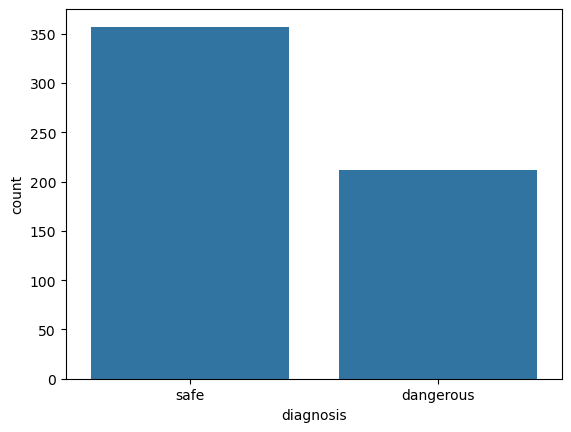

In [27]:
sns.barplot(df['diagnosis'].value_counts())

### Countplot

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\508243111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


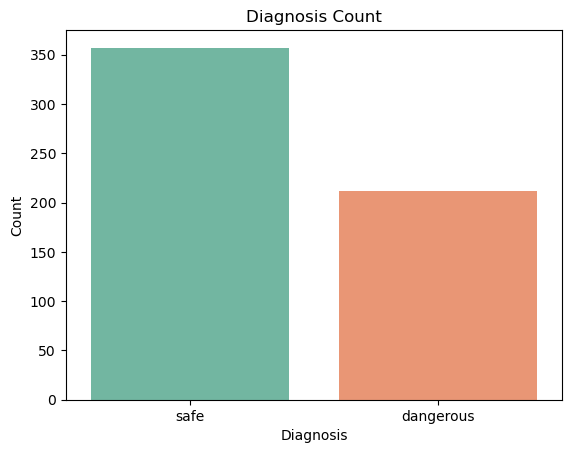

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [29]:
df['radius_mean'].unique()

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 , 13.44 ,
       10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 12.05 , 13.49 ,
       11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 , 19.21 , 14.71 ,
       13.05 ,  8.618, 10.17 ,  8.598,  9.173, 12.68 , 14.78 ,  9.465,
       11.31 ,  9.029, 12.78 , 18.94 ,  8.888, 17.2  , 13.8  , 12.31 ,
       16.07 , 13.53 , 18.05 , 20.18 , 12.86 , 11.45 , 13.34 , 25.22 ,
       19.1  , 12.   , 18.46 , 14.48 , 19.02 , 12.36 , 14.64 , 14.62 ,
       15.37 , 13.27 , 13.45 , 15.06 , 20.26 , 12.18 ,  9.787, 11.6  ,
       14.42 , 13.61 ,  6.981,  9.876, 10.49 , 13.11 , 11.64 , 22.27 ,
       11.34 ,  9.777, 12.63 , 14.26 , 10.51 ,  8.726, 11.93 ,  8.95 ,
      

In [30]:
df['radius_mean'].value_counts()

radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64

In [31]:
def check_gaussian(data):
    sns.distplot(data,kde=True)
    plt.show()
    stats.probplot(df['radius_mean'],dist='norm',plot=plt)
    plt.show()
    a=stats.anderson(data,dist='norm')
    if (a.statistic>a.critical_values[2]):
        print('column is non-gaussian')
    else:
        print('column is gaussian')

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


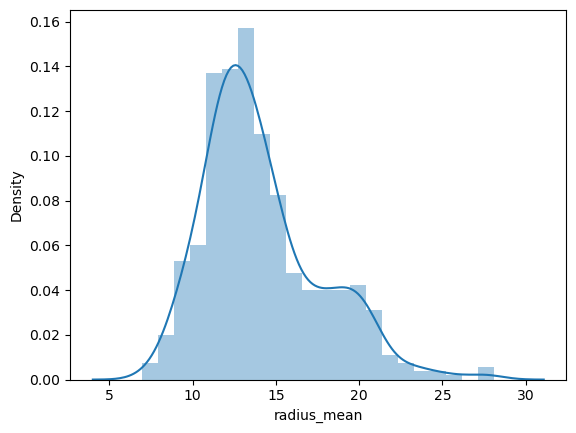

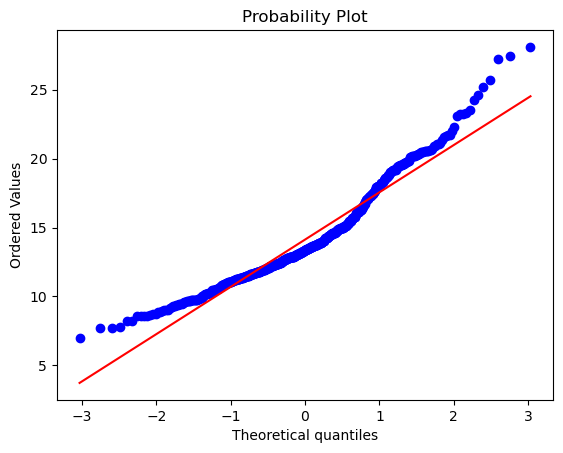

column is non-gaussian


In [32]:
check_gaussian(df['radius_mean'])

In [33]:
skewness=df['radius_mean'].skew()
print('skweness:',skewness)

skweness: 0.9423795716730992


<Axes: ylabel='radius_mean'>

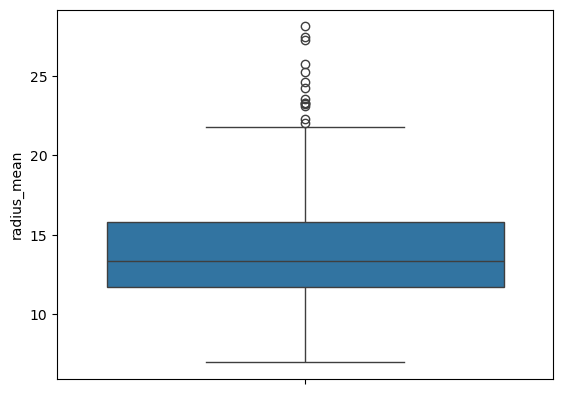

In [34]:
sns.boxplot(df['radius_mean'])

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

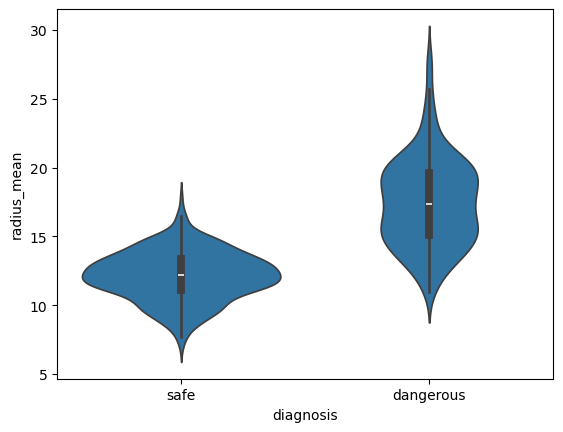

In [35]:
sns.violinplot(x='diagnosis', y='radius_mean', data=df)


# radius_mean
#### * The distribution is not normal shows right skewed
#### * The Q-Q points indicates that the points slightly deviates from the normal line in the upper tail
#### * The boxplot shows several outliers in the higher end above 21
#### *  most of the points are concentrated between 11 to 16,indicating that the majority of tumors fall with in this range

#### * Given the presence of skewness and outliers, applying a RobustScaler is appropriate to reduce their impact during modeling, without removing potentially important medical observations.

#### * Violon plot indicates that Dangerous tumor have a higher median radius,packed around 15-20
#### * safe tumour has a low median radius around 11-13
#### In safe data is more concentrated near the median 

In [36]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    dangerous        17.99         10.38          122.80     1001.0   
1    dangerous        20.57         17.77          132.90     1326.0   
2    dangerous        19.69         21.25          130.00     1203.0   
3    dangerous        11.42         20.38           77.58      386.1   
4    dangerous        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564  dangerous        21.56         22.39          142.00     1479.0   
565  dangerous        20.13         28.25          131.20     1261.0   
566  dangerous        16.60         28.08          108.30      858.1   
567  dangerous        20.60         29.33          140.10     1265.0   
568       safe         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [37]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


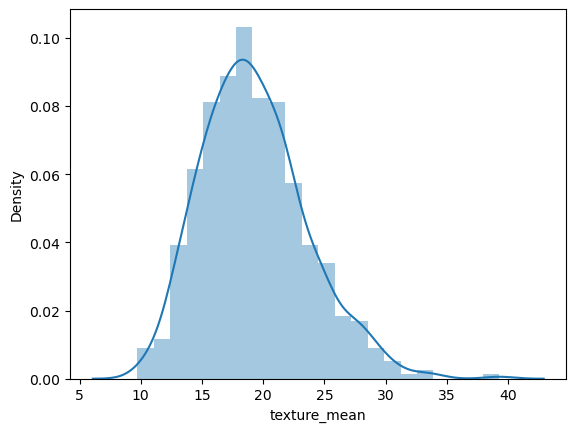

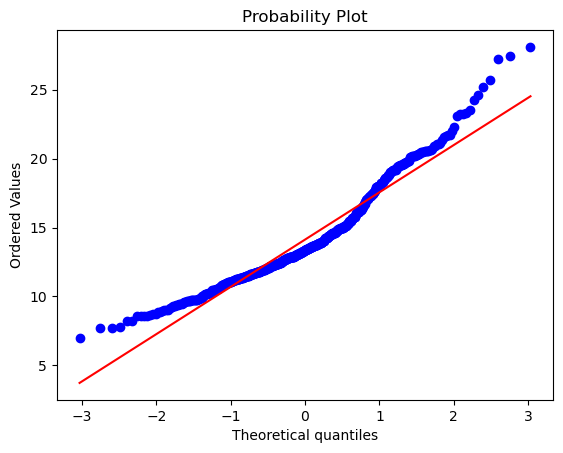

column is non-gaussian


In [38]:
check_gaussian(df['texture_mean'])

<Axes: ylabel='texture_mean'>

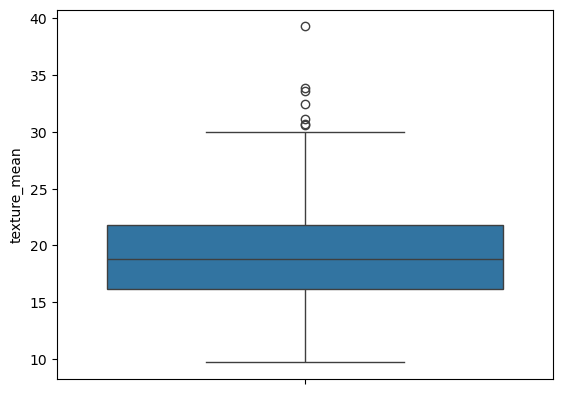

In [39]:
sns.boxplot(df['texture_mean'])

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

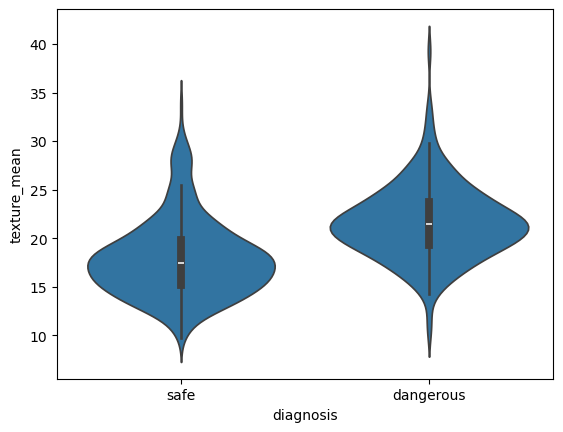

In [40]:
sns.violinplot(x='diagnosis',y='texture_mean',data=df)

In [41]:
skewness=df['texture_mean'].skew()
skewness

0.6504495420828159

# texture_mean
#### * The distribution is not perfectly normal shows slightly right skwed
#### * Q-Q plot shows the points are deviated from the normal line in the upper tails
#### * Boxplot shows the there are few outliers above 30
#### * most of the points are concentrated in between 16 to 22
#### * Given the minor skewness and presence of outliers, applying RobustScaler is a suitable choice to scale the feature while preserving important variations relevant to medical diagnosis.
#### * violin plot indicates tht the median texture is higher in dangerous around 21 to 22
#### * In safe the data id more around 13 to 14

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


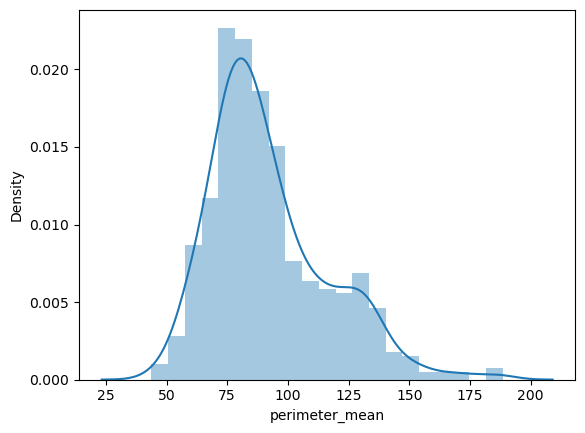

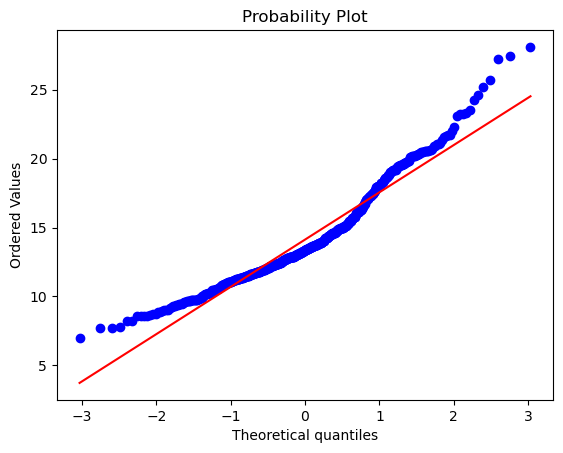

column is non-gaussian


In [42]:
check_gaussian(df['perimeter_mean'])

<Axes: ylabel='perimeter_mean'>

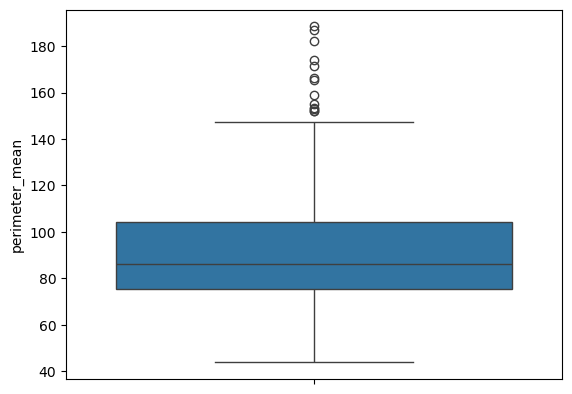

In [43]:
sns.boxplot(df['perimeter_mean'])

In [44]:
skwness=df['perimeter_mean'].skew()
skwness

0.9906504253930081

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

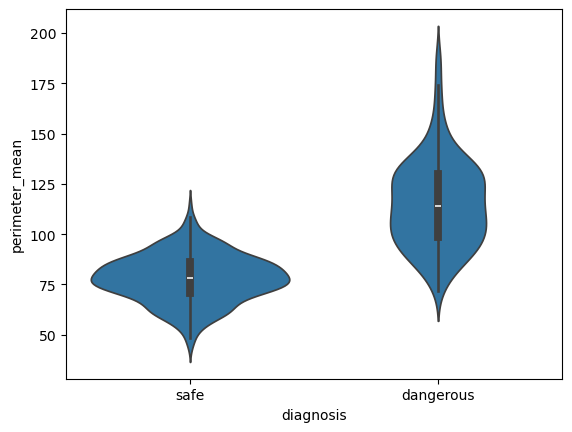

In [45]:
sns.violinplot(x=df['diagnosis'],y=df['perimeter_mean'],data=df)

# perimeter_mean
#### * The distribution is not normal and it is right skewed
#### * The Q-Q plot indicates that the point are deviated from the normal line particularly in the upper tails
#### * The boxplot shows there are moderate outliers above 150
#### * most of the points are cincentrated in between 75 to 110
#### * The dangerous tumour has a wide and more spread median around 90-125
#### * The safe tumour is narrow and more compact median around 80

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


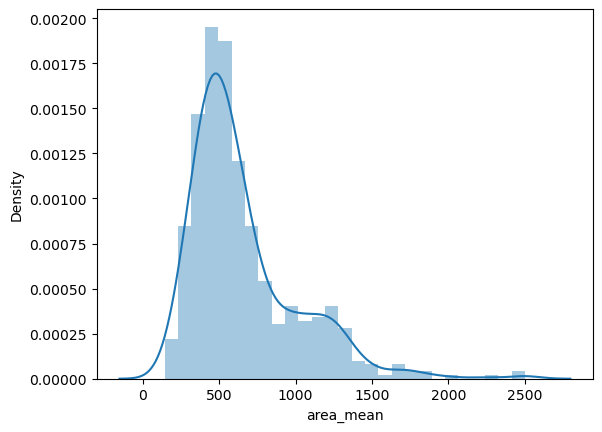

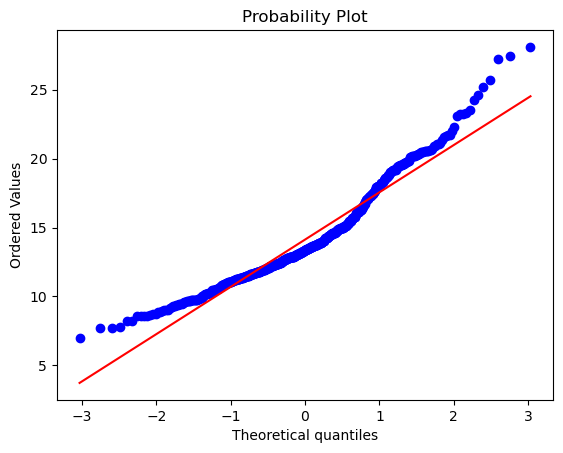

column is non-gaussian


In [46]:
check_gaussian(df['area_mean'])

<Axes: ylabel='area_mean'>

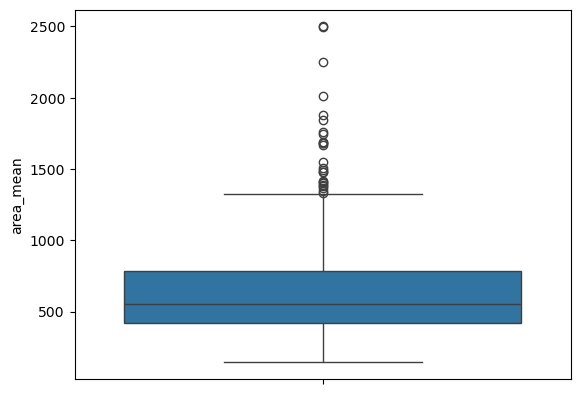

In [47]:
sns.boxplot(df['area_mean'])

In [48]:
skweness=df['area_mean'].skew()
skweness

1.6457321756240424

<Axes: xlabel='diagnosis', ylabel='area_mean'>

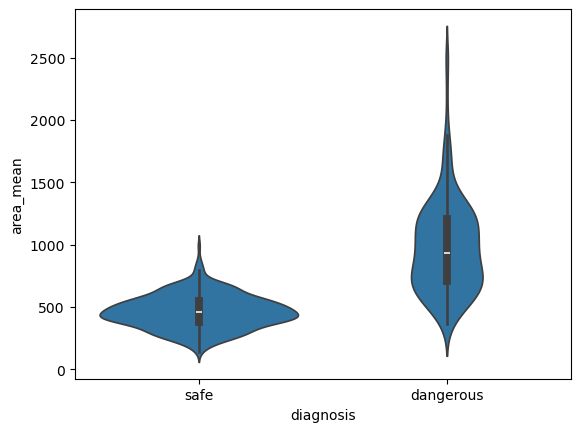

In [49]:
sns.violinplot(x='diagnosis',y='area_mean',data=df)

# area_mean
#### * The distribution is not normal it is heavily right skewed
#### * The Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * The boxplot shows there are several outliers above 1400
#### * most of the poinnts are concentrated in between 400 to 800
#### * Dangerous tumour has mor wider range median around 700 to 1300
#### Safe group has less and median around 450 to 520

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


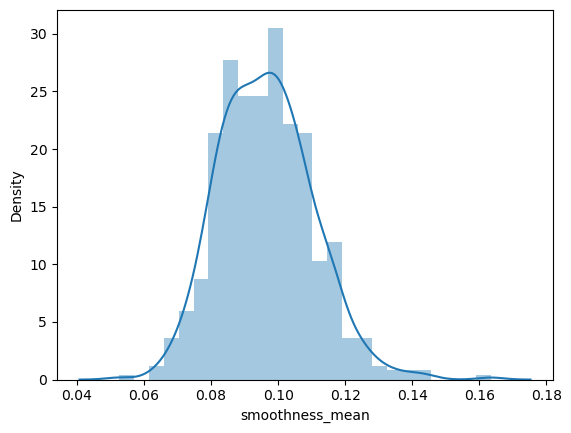

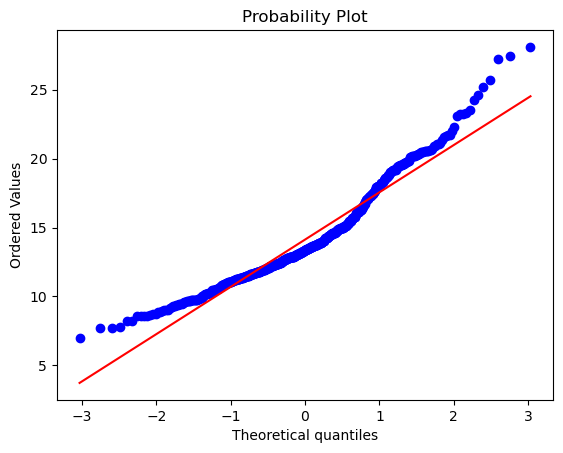

column is non-gaussian


In [50]:
check_gaussian(df['smoothness_mean'])

<Axes: ylabel='smoothness_mean'>

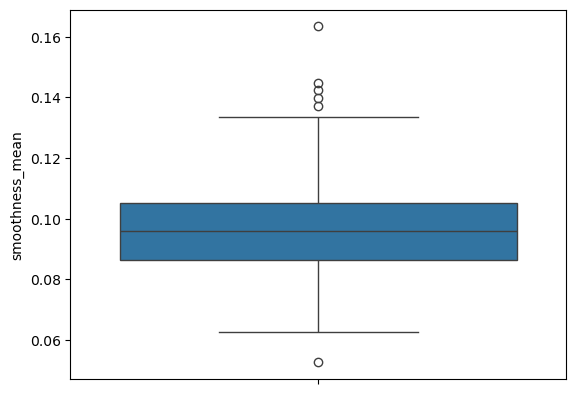

In [51]:
sns.boxplot(df['smoothness_mean'])

In [52]:
skweness=df['smoothness_mean'].skew()
skweness

0.45632376481955844

<Axes: xlabel='diagnosis', ylabel='smoothness_mean'>

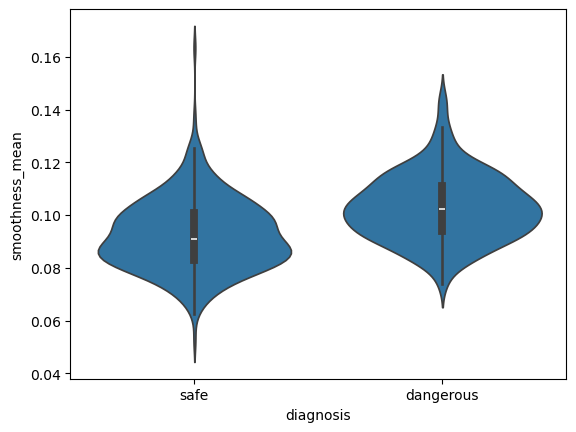

In [53]:
sns.violinplot(x='diagnosis',y='smoothness_mean',data=df)

# smoothness_mean
#### * The distribution is not perfectly normal it slightly right skwed
#### * The Q-Q plot indicates that the points are deviated from the normal line especially in the upper tail
#### * There boxplot shows outliers are present above and below
#### * most of the points are concentrated in between 0.09.0.011
#### * The dangerous group has higher median comapred to the safe ones
#### * safe tumors are more tightly packed around median in between 0.08 to 0.10


C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


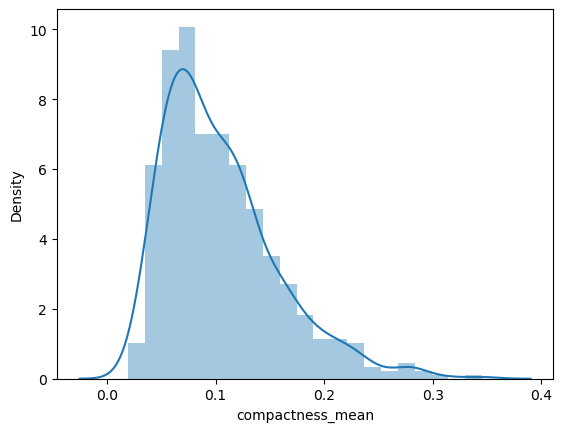

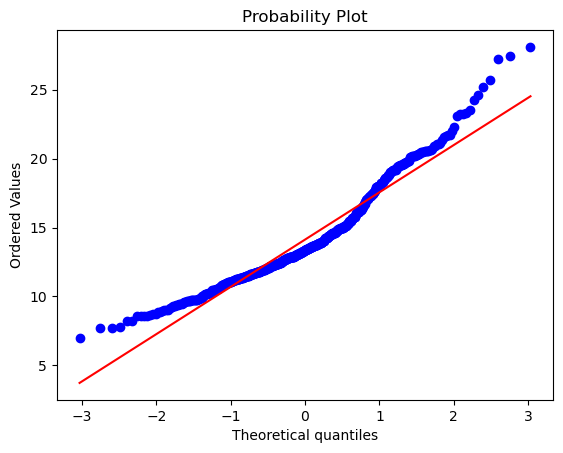

column is non-gaussian


In [54]:
check_gaussian(df['compactness_mean'])

<Axes: ylabel='compactness_mean'>

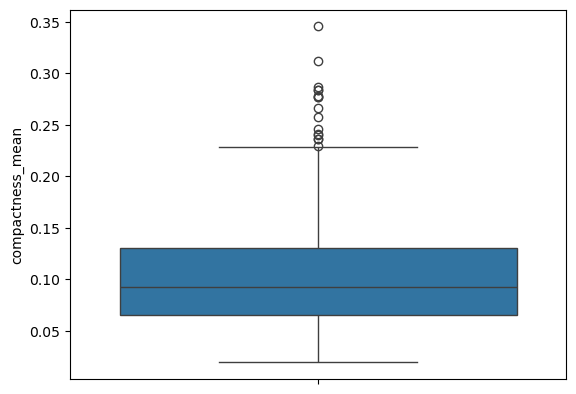

In [55]:
sns.boxplot(df['compactness_mean'])

In [56]:
skweness=df['compactness_mean'].skew()
skweness

1.1901230311980404

<Axes: xlabel='diagnosis', ylabel='compactness_mean'>

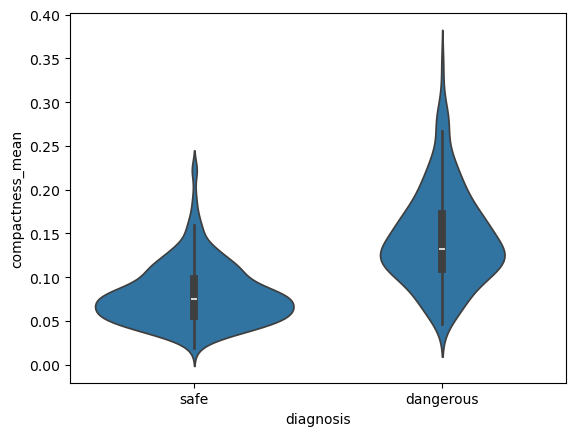

In [57]:
sns.violinplot(x='diagnosis',y='compactness_mean',data=df)

# compactness_mean
#### * The distribution is right skwewd
#### * Q-Q plots indicates that the points are deviated from the normal line especially in the upper tails
#### * There are several outliers above the 24
#### * most of the points are concentrated in between0.07 to 0.14
### * The dangerous tumour has higher median range around 0.08 to 0.18
#### * in safe the data is more tightly packed around median 

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


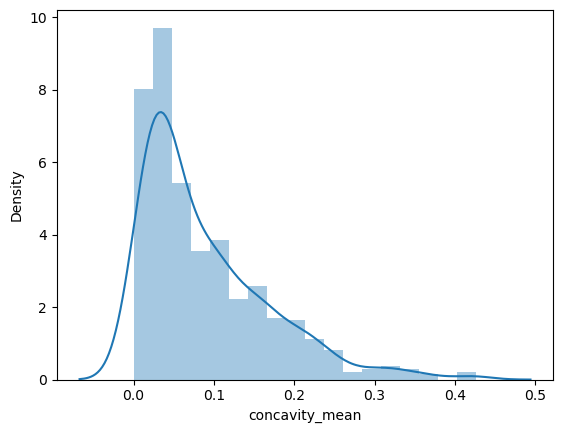

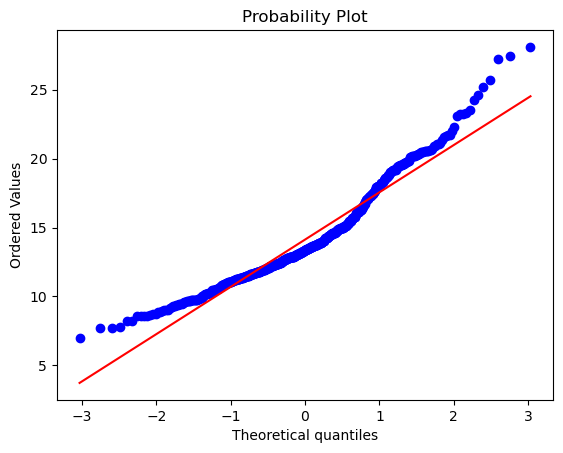

column is non-gaussian


In [58]:
check_gaussian(df['concavity_mean'])

<Axes: ylabel='concavity_mean'>

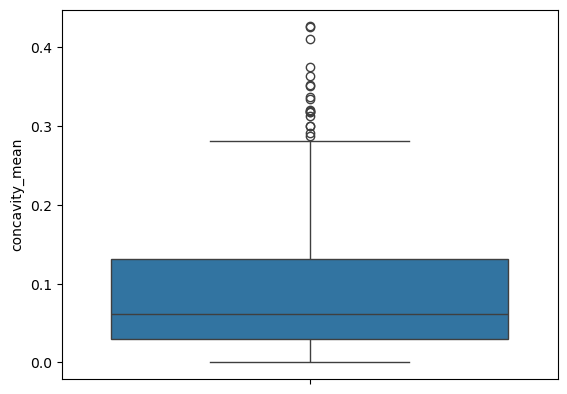

In [59]:
sns.boxplot(df['concavity_mean'])

In [60]:
skweness=df['concavity_mean'].skew()
skweness

1.4011797389486722

<Axes: xlabel='diagnosis', ylabel='concavity_mean'>

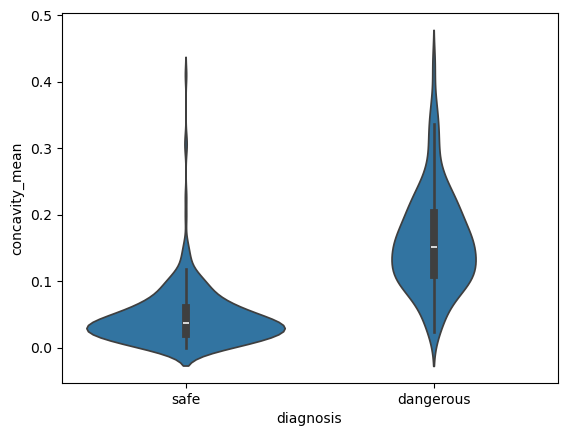

In [61]:
sns.violinplot(x='diagnosis',y='concavity_mean',data=df)

# concavity_mean
#### * The distribution is not normal is is heavily right skewed
#### * Q-Q plot indicates that the points are deviated from the noraml line especially in the upper tails
#### * there are few outliers above 0.27
#### * In dangeours tumor has the higher median range aroud 0.1 to 0.2
#### * in safe tumour they are  more tightly packed around median


C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


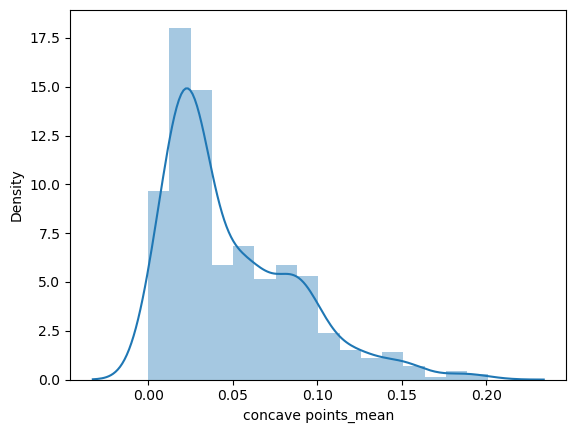

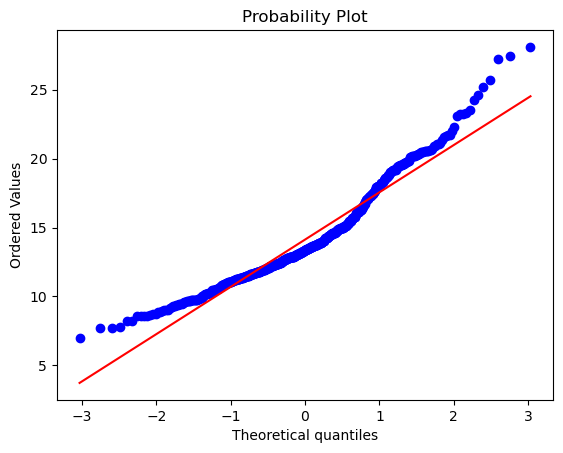

column is non-gaussian


In [62]:
check_gaussian(df['concave points_mean'])

<Axes: ylabel='concave points_mean'>

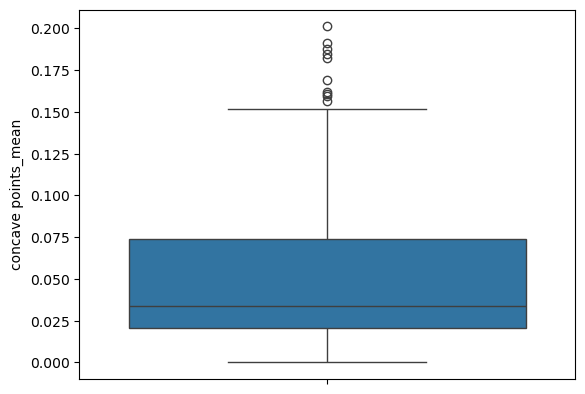

In [63]:
sns.boxplot(df['concave points_mean'])

In [64]:
skewness=df['concave points_mean'].skew()
skewness

1.1711800812336282

<Axes: xlabel='diagnosis', ylabel='concave points_mean'>

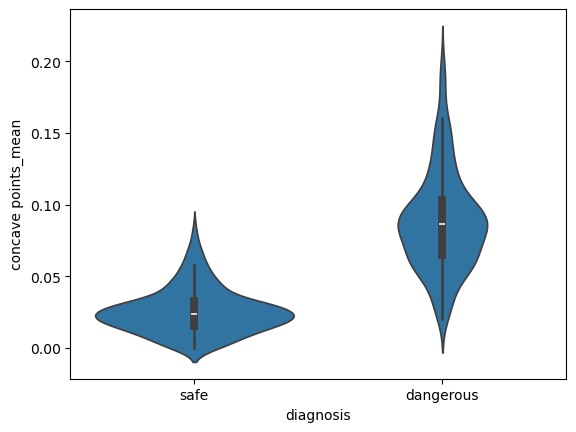

In [65]:
sns.violinplot(x='diagnosis',y='concave points_mean',data=df)

# concave points_mean
####  * The distribution is not normal heavily right skwed
####  * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * There are many outliers above 0.150
####  * most of the points are concentrated in between 0.024 to 0.075
#### * The dangerous tumour has the more median range around 0.6 to 0.10
#### * The safe tumor has the low median range more around the median around 0.01 to 0.03

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


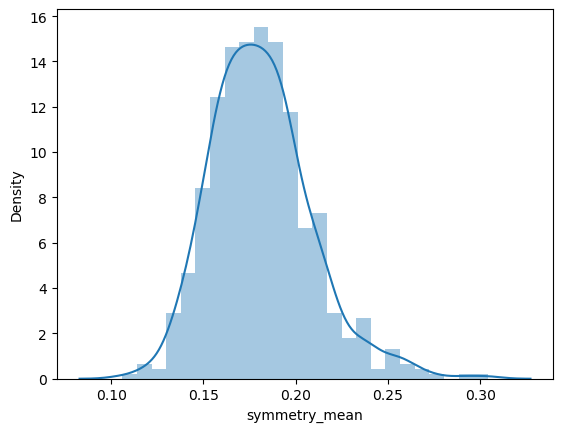

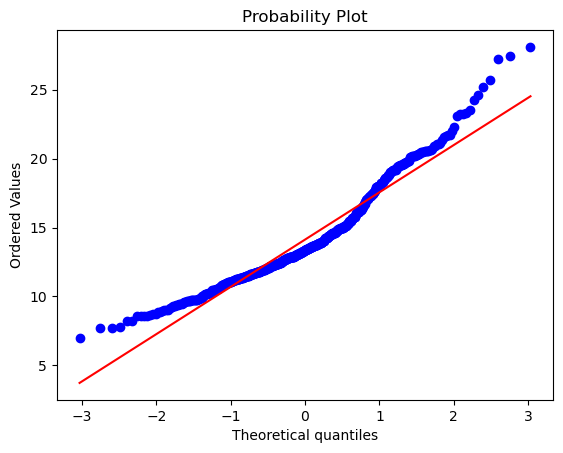

column is non-gaussian


In [66]:
check_gaussian(df['symmetry_mean'])

<Axes: ylabel='symmetry_mean'>

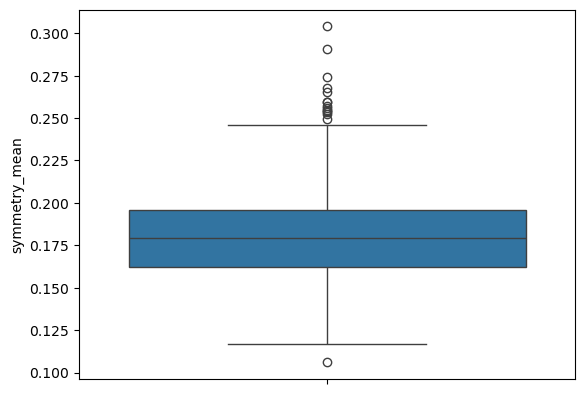

In [67]:
sns.boxplot(df['symmetry_mean'])

In [68]:
skweness=df['symmetry_mean'].skew()
skweness

0.7256089733641999

<Axes: xlabel='diagnosis', ylabel='symmetry_mean'>

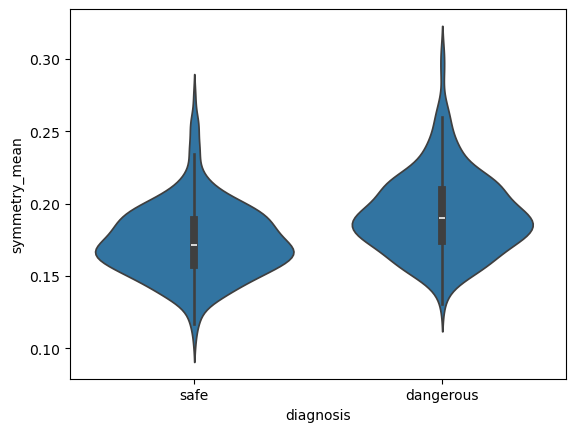

In [69]:
sns.violinplot(x='diagnosis',y='symmetry_mean',data=df)

# symmetry_mean
#### * The distribution is not perfectly normal it is right skewed
#### * Q-Q indiccates that the points are deviated from the normal line especially in the upper tail
#### * There are many outliers above 0.250
#### * most of the points are concentrated in between 0.160 to 0.250
#### * In dangerous tumour more median range wwhen compared to the safe ones

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


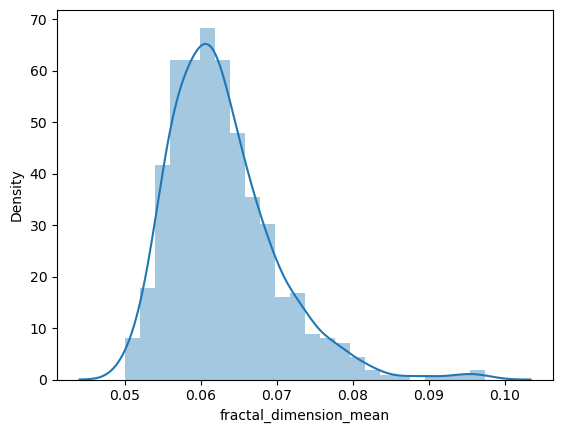

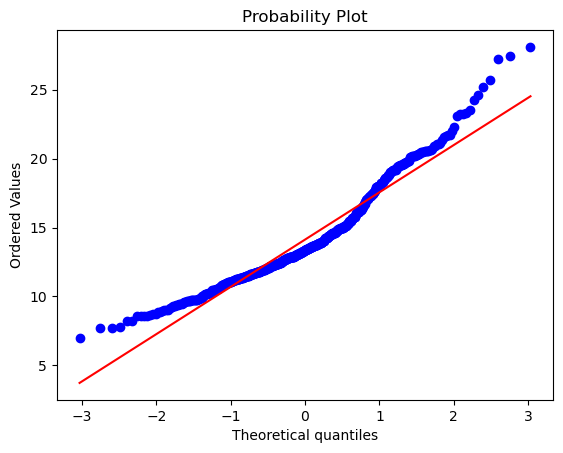

column is non-gaussian


In [70]:
check_gaussian(df['fractal_dimension_mean'])

<Axes: ylabel='fractal_dimension_mean'>

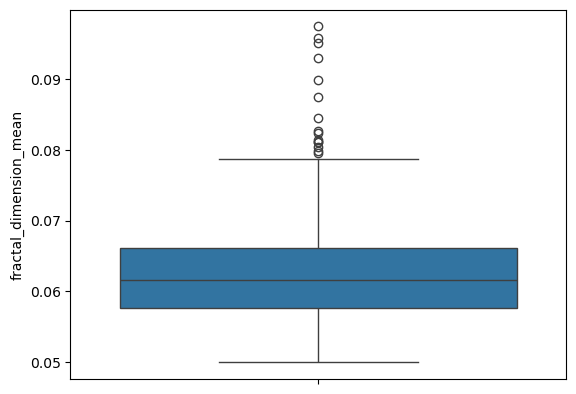

In [71]:
sns.boxplot(df['fractal_dimension_mean'])

In [72]:
skweness=df['fractal_dimension_mean'].skew()
skweness

1.3044888125755076

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_mean'>

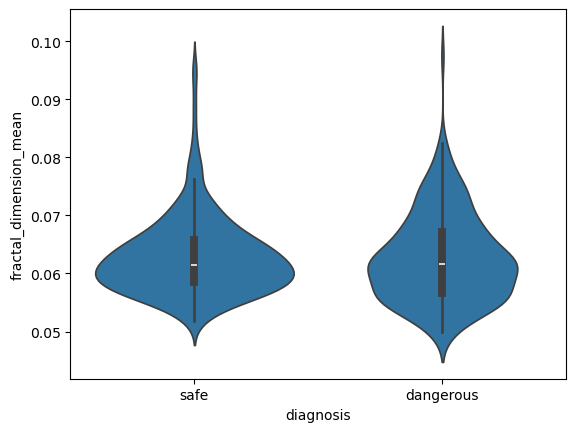

In [73]:
sns.violinplot(x='diagnosis',y='fractal_dimension_mean',data=df)

# fractal_dimension_mean
#### * The distribution is not perfectly it is right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper t ails
#### * There are many outliers above 0.08
#### * most of the points are conncentrated in between 0.06 to 0.07
#### * The median range for dangerous tumour is slightly higher than the safe tumour

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


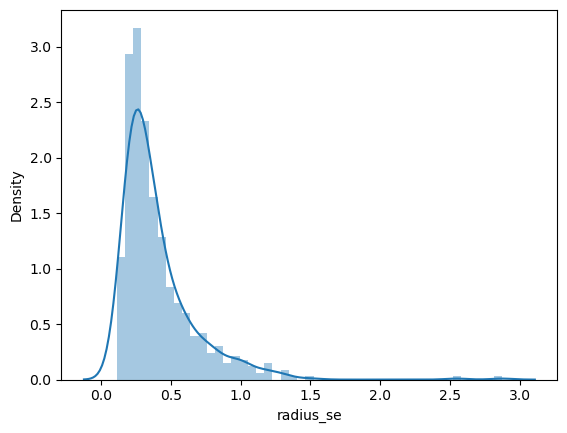

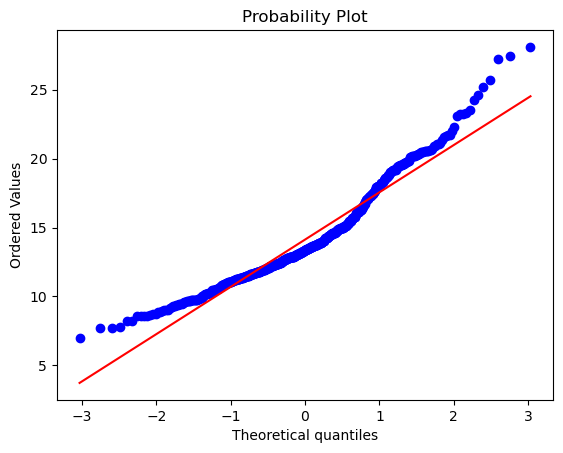

column is non-gaussian


In [74]:
check_gaussian(df['radius_se'])

<Axes: ylabel='radius_se'>

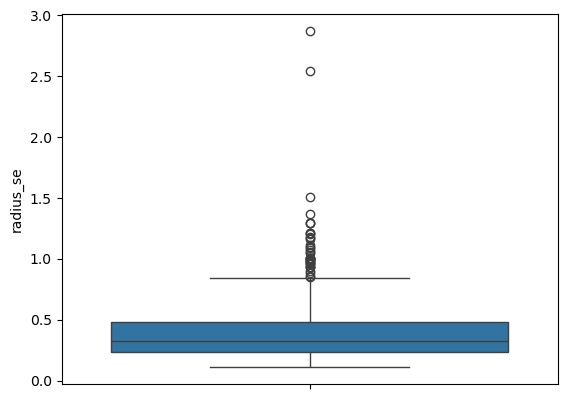

In [75]:
sns.boxplot(df['radius_se'])

In [76]:
skkweness=df['radius_se'].skew()
skkweness

3.0886121663847574

<Axes: xlabel='diagnosis', ylabel='radius_se'>

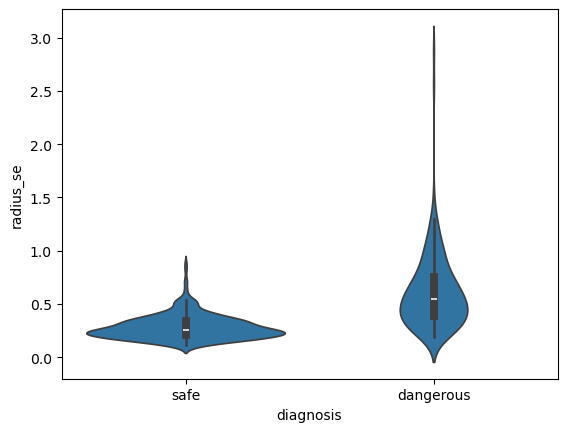

In [77]:
sns.violinplot(x='diagnosis',y='radius_se',data=df)

# radius_se
#### * The distribution is not normal heavily right skeweed 
#### * Q-Q plot indicates that the points are deviated from the normal line  especially in the upper tails
#### * the distribution is non-gaussian
#### * there are many ouliers above the 0.07
#### * in  Dangerous the median range is higher 
#### * in safe low median range more around median

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


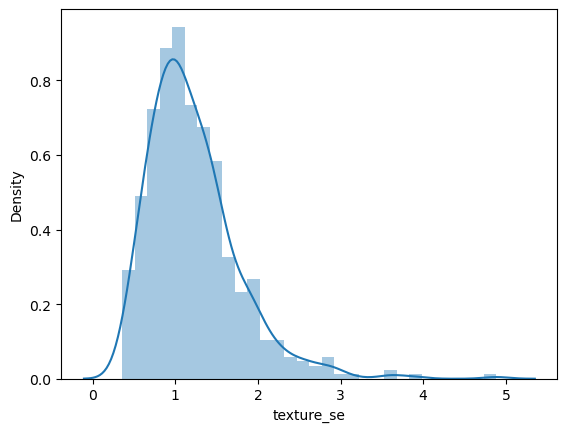

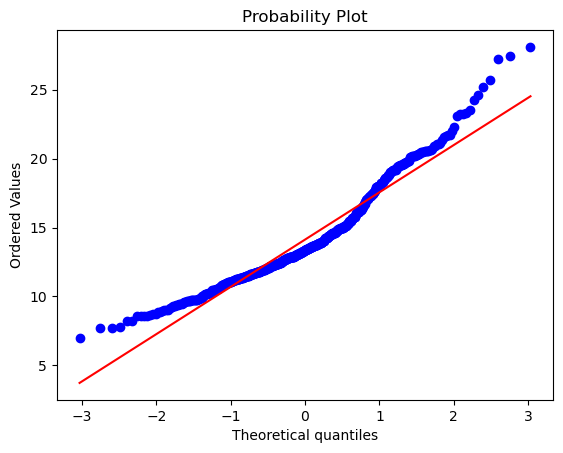

column is non-gaussian


In [78]:
check_gaussian(df['texture_se'])

<Axes: ylabel='texture_se'>

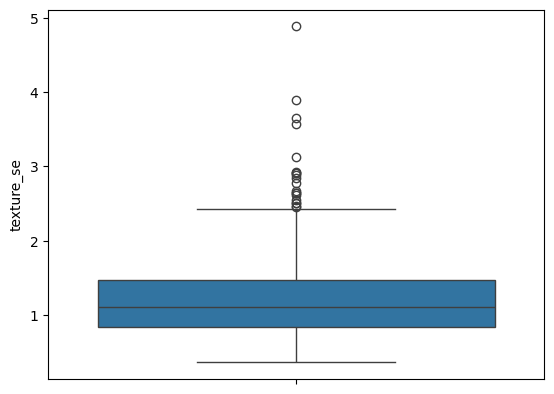

In [79]:
sns.boxplot(df['texture_se'])

In [80]:
skewness=df['texture_se'].skew()
skewness

1.646443808753053

<Axes: xlabel='diagnosis', ylabel='texture_se'>

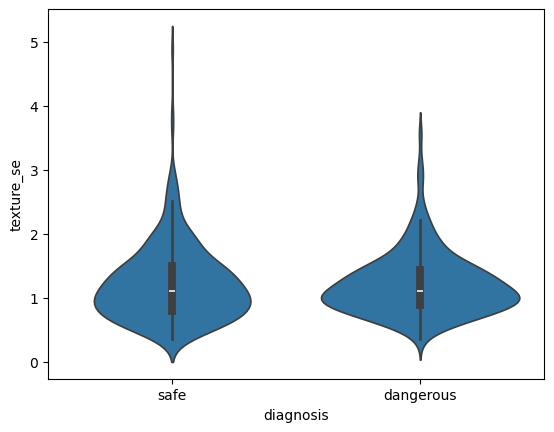

In [81]:
sns.violinplot(x='diagnosis',y='texture_se',data=df)

# texture_se
#### * The distribution is not normal it is heavilt right skewed
#### * Q-Q plot indicates that the points are devaiated from the normal line especially in the upper tails
#### * The distributionn is non-gaussian
#### * There are many outliers above 2.5
#### * most of the points are concentrated in between 0.7 to 1.5
#### * Dangerous median range slightly more than safe ones

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


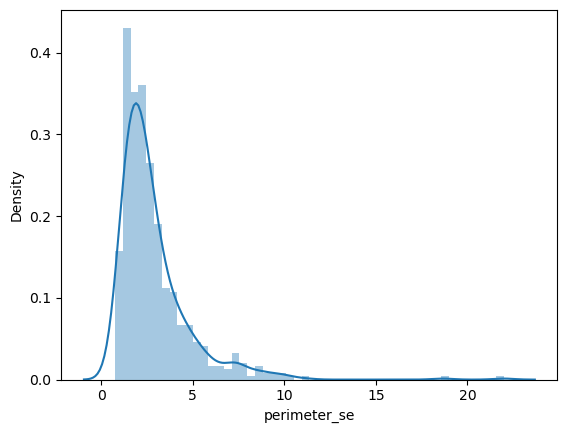

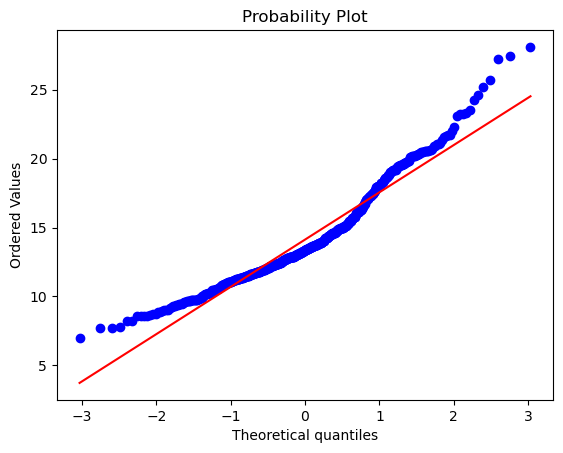

column is non-gaussian


In [82]:
check_gaussian(df['perimeter_se'])

<Axes: ylabel='perimeter_se'>

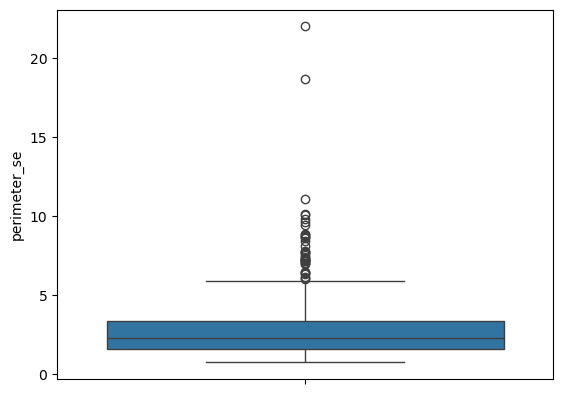

In [83]:
sns.boxplot(df['perimeter_se'])

In [84]:
skeweness=df['perimeter_se'].skew()
skeweness

3.443615202194899

<Axes: xlabel='diagnosis', ylabel='perimeter_se'>

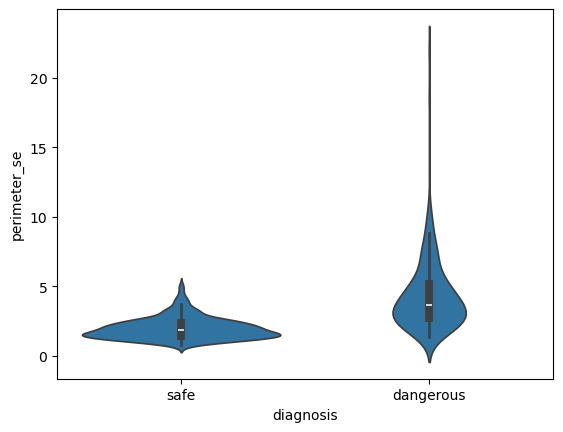

In [85]:
sns.violinplot(x='diagnosis',y='perimeter_se',data=df)

# perimeter_se
#### * The distribution is not normal it is heavily right skewed
#### * Q-Q plot indicates that the points are deviated fromm the normal line especially in the upper tails
#### * The distribution is non-gaussian
#### * There are many outliers above 6
#### * most of the points are concentrated in betweenn 1 to 4
#### * Dangerous tumor has the slightly more median range than the safe ones

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


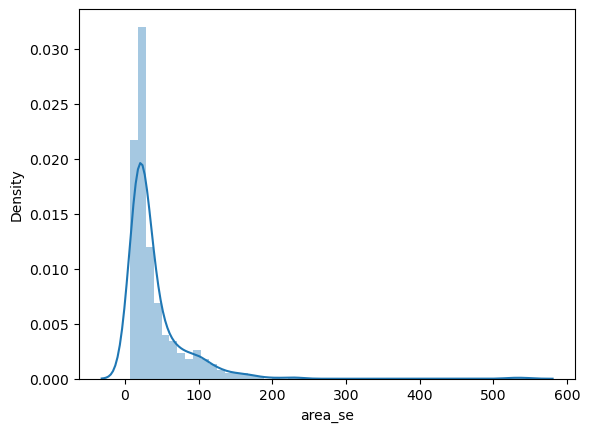

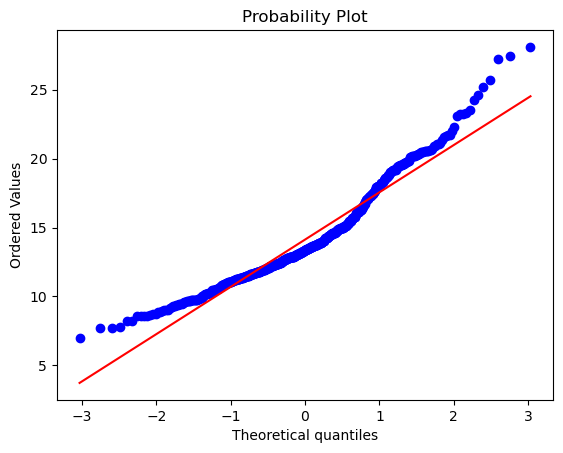

column is non-gaussian


In [86]:
check_gaussian(df['area_se'])

<Axes: ylabel='area_se'>

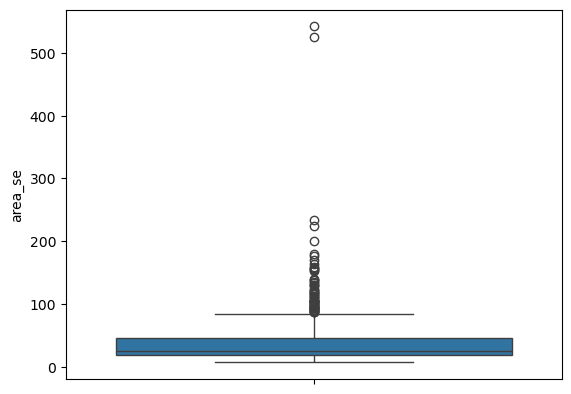

In [87]:
sns.boxplot(df['area_se'])

In [88]:
skweness=df['area_se'].skew()
skweness

5.447186284898394

<Axes: xlabel='diagnosis', ylabel='area_se'>

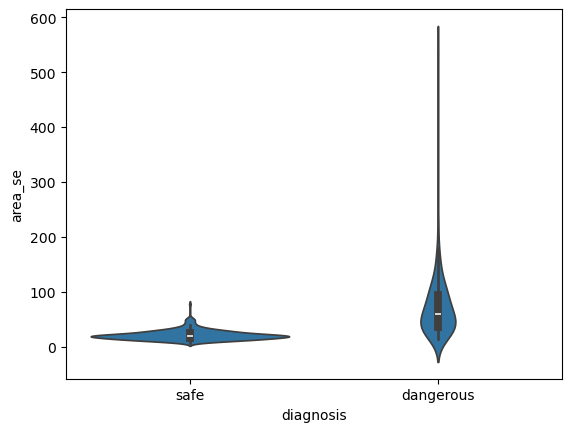

In [89]:
sns.violinplot(x='diagnosis',y='area_se',data=df)

# area_se
#### * The distribution is not normal heavily right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * The distribution is non gaussian
#### * there are many outliers above 90
#### * most of the points are concentrated in between 10 to 50
#### * Dangerous tumours more median range than safe tumour
#### * safe tumours more around the median range

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


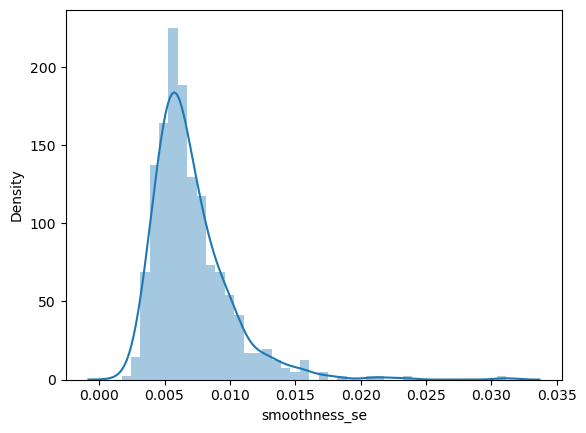

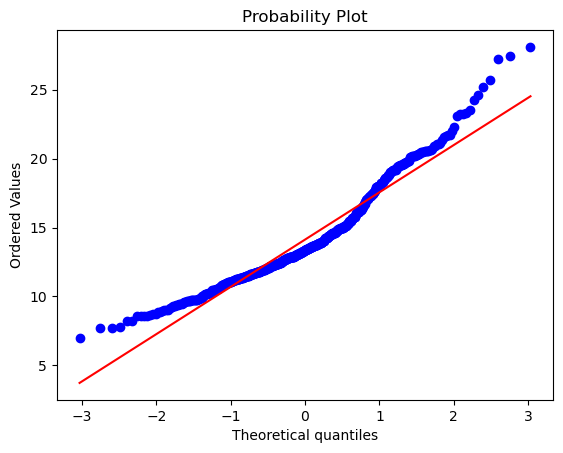

column is non-gaussian


In [90]:
check_gaussian(df['smoothness_se'])

<Axes: ylabel='smoothness_se'>

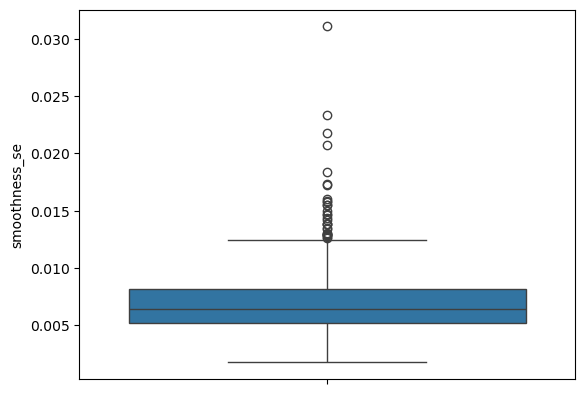

In [91]:
sns.boxplot(df['smoothness_se'])

In [92]:
skeweness=df['smoothness_se'].skew()
skeweness

2.314450056636759

<Axes: xlabel='diagnosis', ylabel='smoothness_se'>

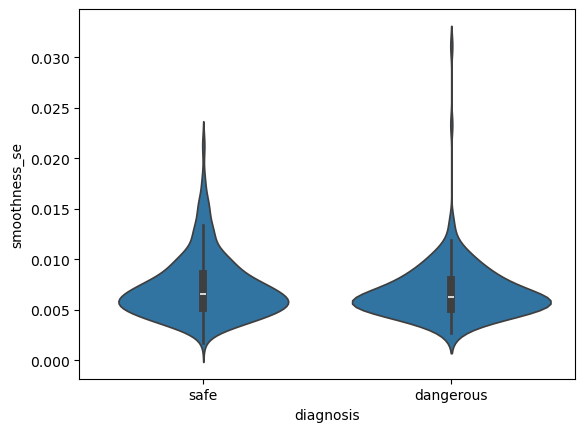

In [93]:
sns.violinplot(x='diagnosis',y='smoothness_se',data=df)

# smoothness_se
#### * The distribution is not normal it is heavily right skewes
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * The distribution is non-gauusian
#### * outliers are present above 0.014\
#### * most of the points are concentrated in between 0.005 to 0.007
#### * dangerous and safe both tumours has equal median range more outliers in dangerous

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


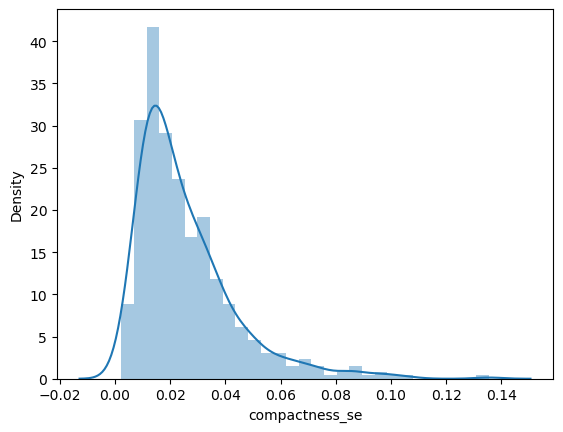

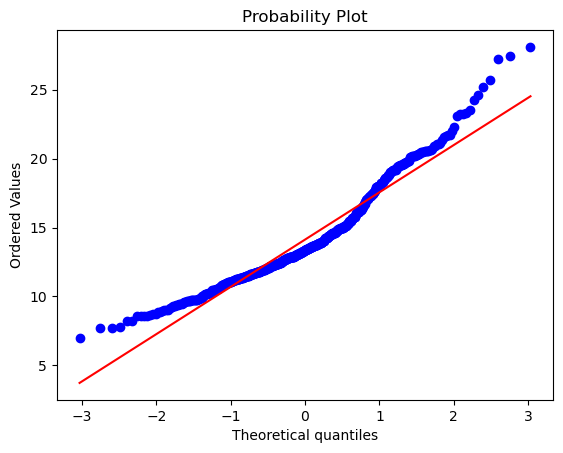

column is non-gaussian


In [94]:
check_gaussian(df['compactness_se'])

<Axes: ylabel='compactness_se'>

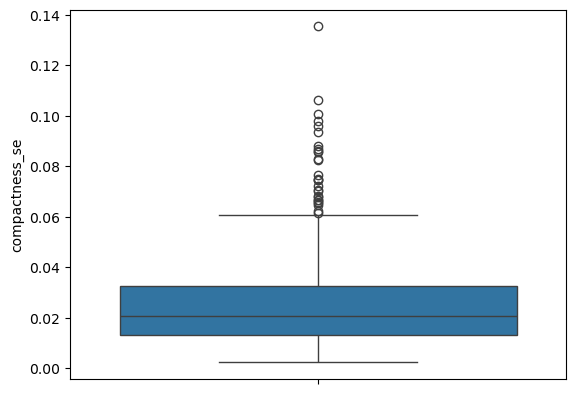

In [95]:
sns.boxplot(df['compactness_se'])

In [96]:
skewness=df['compactness_se'].skew()
skewness

1.9022207096378565

<Axes: xlabel='diagnosis', ylabel='compactness_se'>

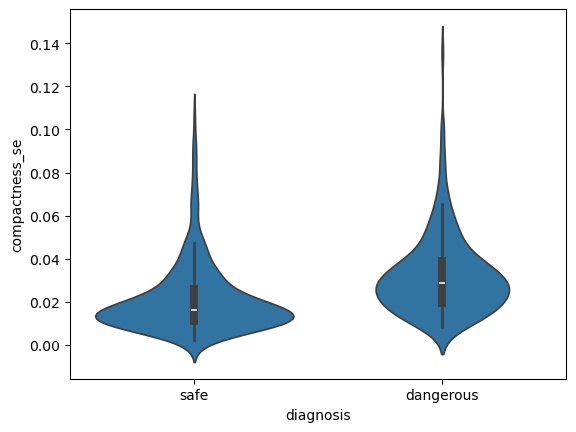

In [97]:
sns.violinplot(x='diagnosis',y='compactness_se',data=df)

# compactness_se
#### * The distribution is not normal heavily right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especally in the upper tails
#### * outliers are present above the 0.06
#### * most of the points are concentrated in between 0.001 to 0.003
#### * dangerous tumours has slightly more median range than the safe ones 


C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


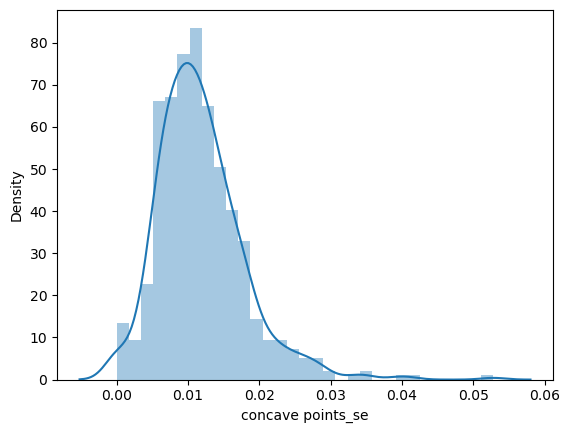

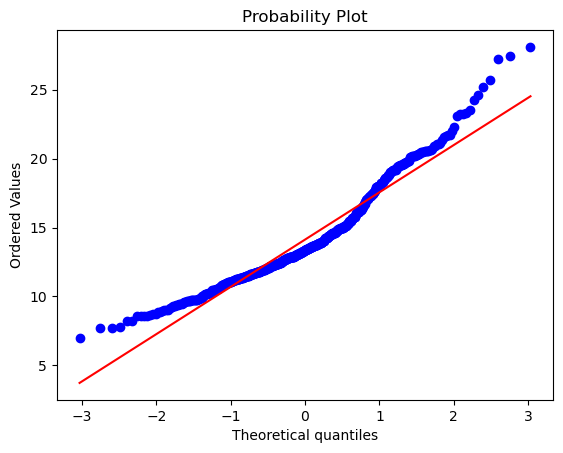

column is non-gaussian


In [98]:
check_gaussian(df['concave points_se'])

<Axes: ylabel='concave points_se'>

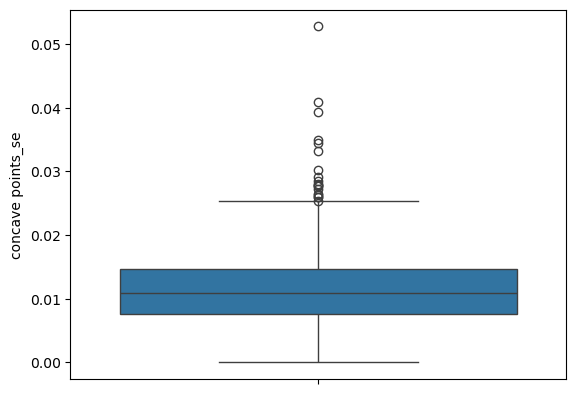

In [99]:
sns.boxplot(df['concave points_se'])

In [100]:
skewness=df['concave points_se'].skew()
skewness

1.4446781446974786

<Axes: xlabel='diagnosis', ylabel='concave points_se'>

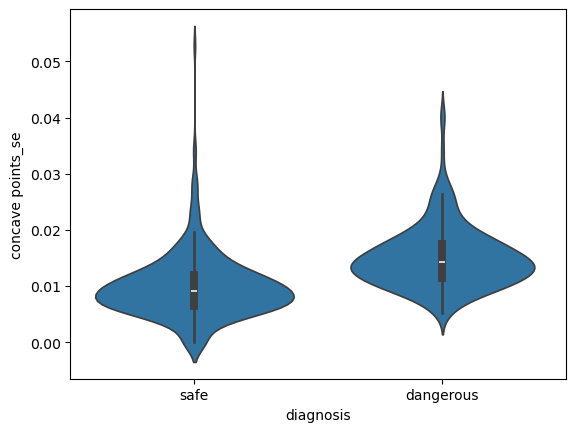

In [101]:
sns.violinplot(x='diagnosis',y='concave points_se',data=df)

# concave points_se
#### * The distribution is not normal it is heavily right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * THe distribution is non-gaussian
#### * outliers are present above 0.25
#### * most of the points are concentrated in between 0.005 to 0.015
#### * Dangerous tumours has slightly higher range than the safe tumours

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


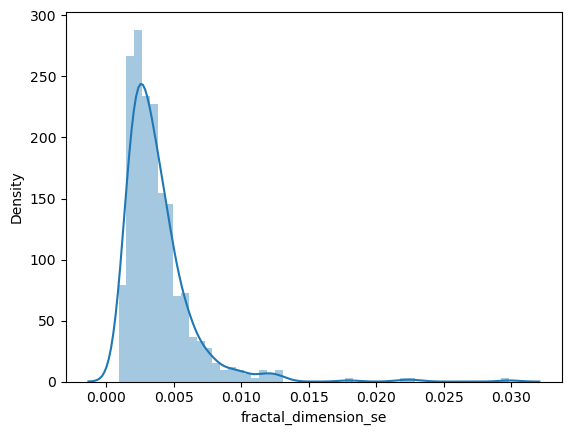

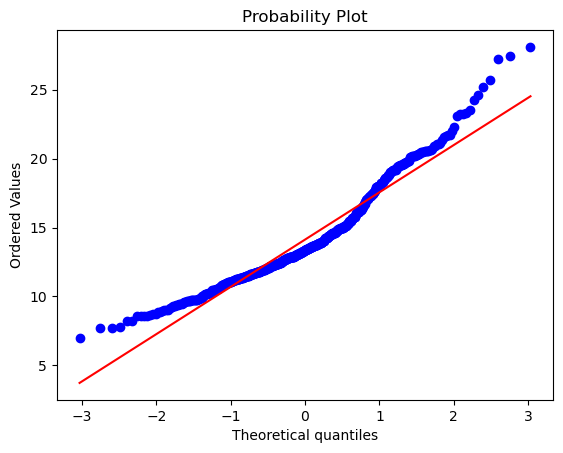

column is non-gaussian


In [102]:
check_gaussian(df['fractal_dimension_se'])

<Axes: ylabel='fractal_dimension_se'>

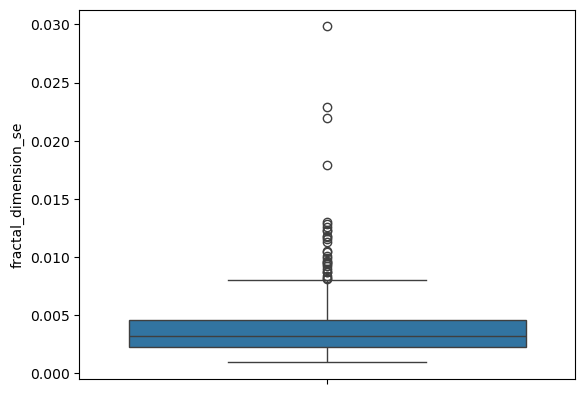

In [103]:
sns.boxplot(df['fractal_dimension_se'])

In [104]:
skweness=df['fractal_dimension_se'].skew()
skweness

3.923968620227413

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_se'>

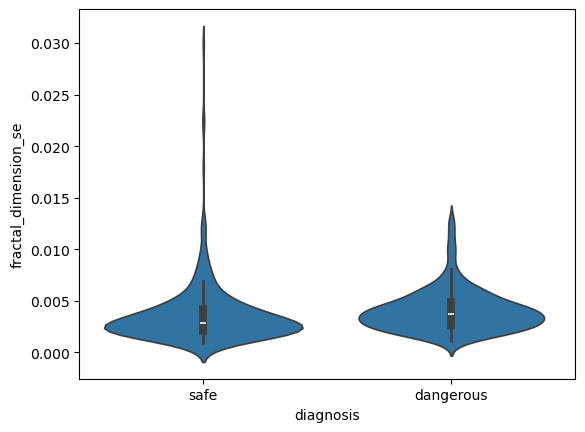

In [105]:
sns.violinplot(x='diagnosis',y='fractal_dimension_se',data=df)

# fractal_dimension_se
#### * The distribution is not normal it is heavily right skewed
#### * Q-Q plots indicates that the points are deviated from the normal line especially in the upper tails
#### * The distribution is non-gaussian
#### *  outliers are present above the 0.007
#### * Dangerous tumours and safe tumours both has same range

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


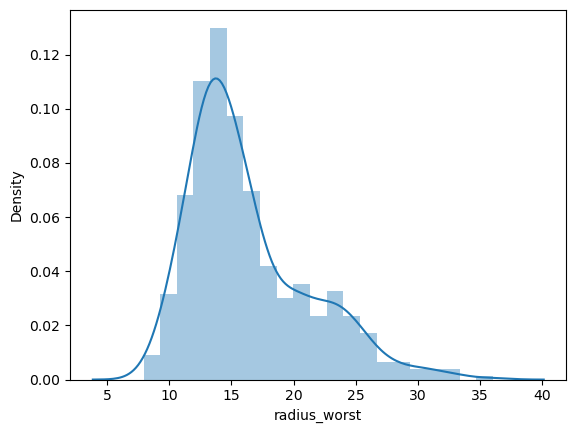

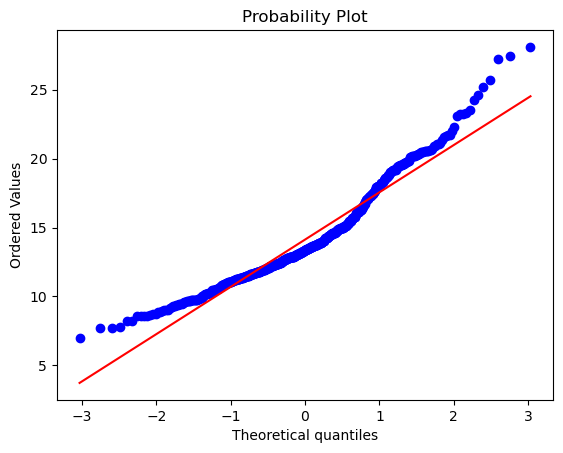

column is non-gaussian


In [106]:
check_gaussian(df['radius_worst'])

<Axes: ylabel='radius_worst'>

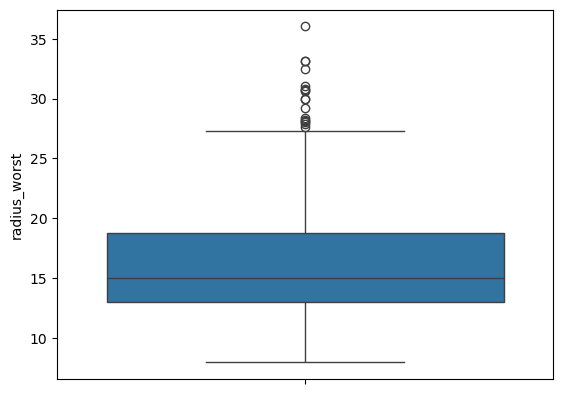

In [107]:
sns.boxplot(df['radius_worst'])

In [108]:
skewness=df['radius_worst'].skew()
skewness

1.1031152059604372

<Axes: xlabel='diagnosis', ylabel='radius_worst'>

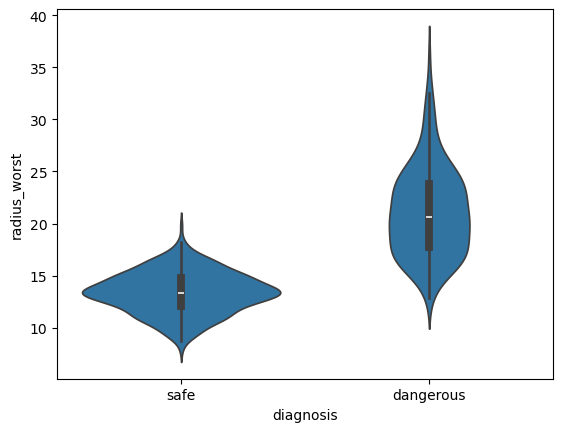

In [109]:
sns.violinplot(x='diagnosis',y='radius_worst',data=df)

# radius_worst
#### * The distribution is not normal it is right skwed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * The distribution is non-gaussian
#### * outliers are present above 27
#### * most of the points are concentrated in between 13 to 20
#### * in dangerous tumours the median range more around 17 to 25
#### * In safe tumors there is low median range around 13 to 15


C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


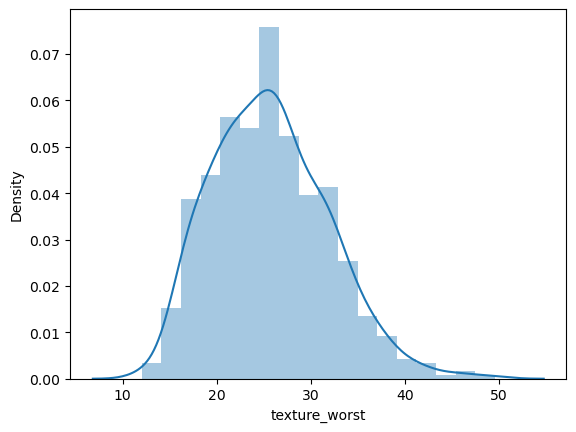

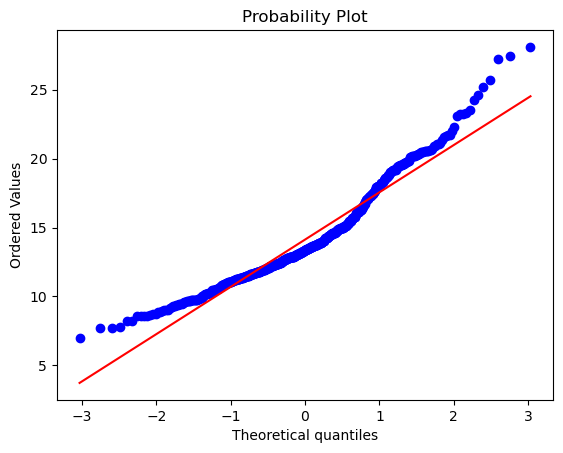

column is non-gaussian


In [110]:
check_gaussian(df['texture_worst'])

<Axes: ylabel='texture_worst'>

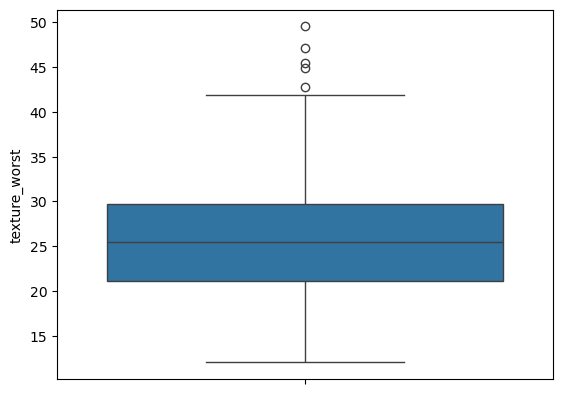

In [111]:
sns.boxplot(df['texture_worst'])

In [112]:
skweness=df['texture_worst'].skew()
skweness

0.49832130948716474

<Axes: xlabel='diagnosis', ylabel='texture_worst'>

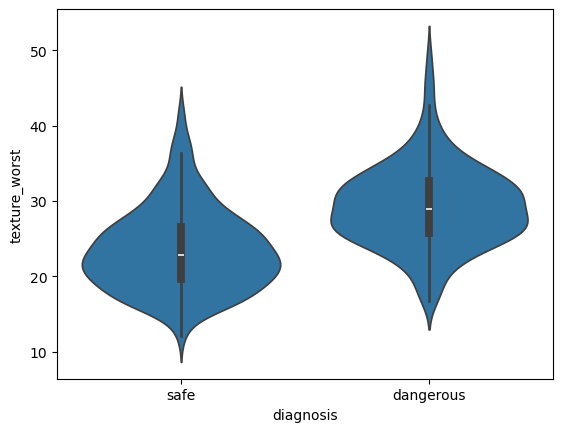

In [113]:
sns.violinplot(x='diagnosis',y='texture_worst',data=df)

# texture_worst
#### * The distribution is not perfectly normal it is slightly right skewes
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * The distribution is non-gaussian
#### * outliers are present above the 20
#### * most of the points are concentrated in between  20 to 30
#### * dangerous has the more median range compared to the safe tumour
#### in both more tumour around median

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


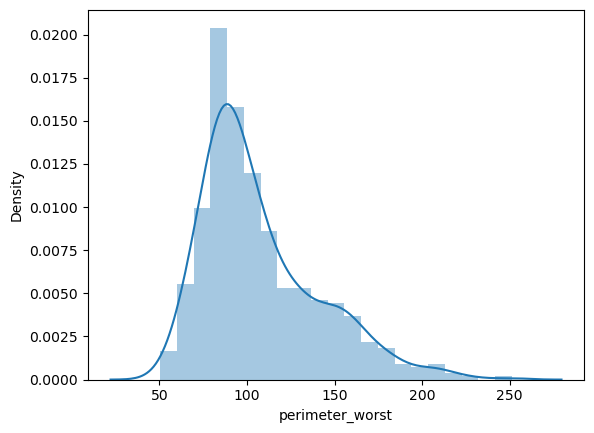

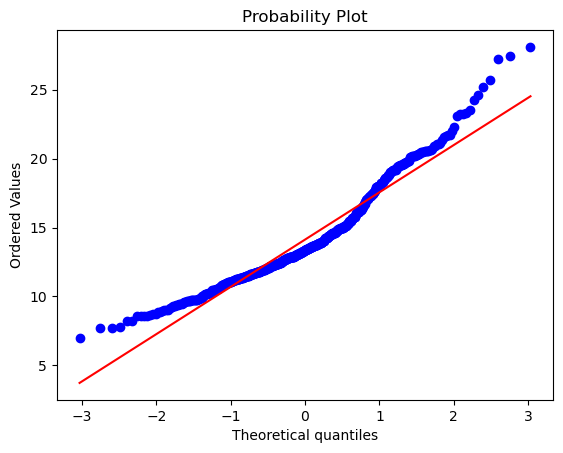

column is non-gaussian


In [114]:
check_gaussian(df['perimeter_worst'])

<Axes: ylabel='perimeter_worst'>

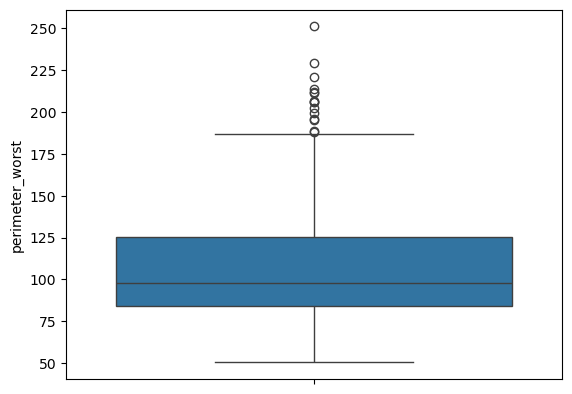

In [115]:
sns.boxplot(df['perimeter_worst'])

In [116]:
skweness=df['perimeter_worst'].skew()
skweness

1.1281638713683722

<Axes: xlabel='diagnosis', ylabel='perimeter_worst'>

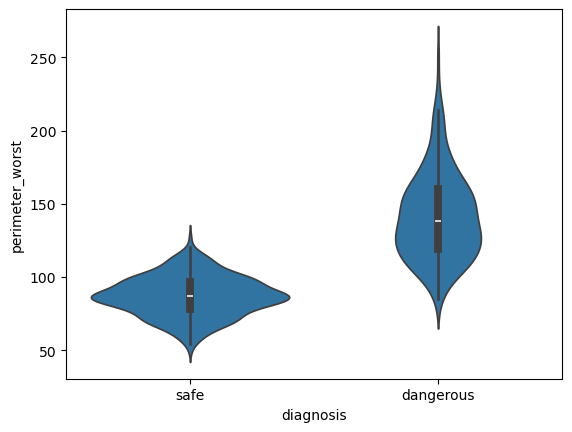

In [117]:
sns.violinplot(x='diagnosis',y='perimeter_worst',data=df)

# perimeter_worst
#### * The distribution is not normal mostly right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * the distribution is non-guassian
#### * ouliers are present above the 80
#### * most of the points are concentrated in between 75 to 125
#### * dangerous has the more median range safe tumor has low median range 
#### * in safe the tumor is more around median

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


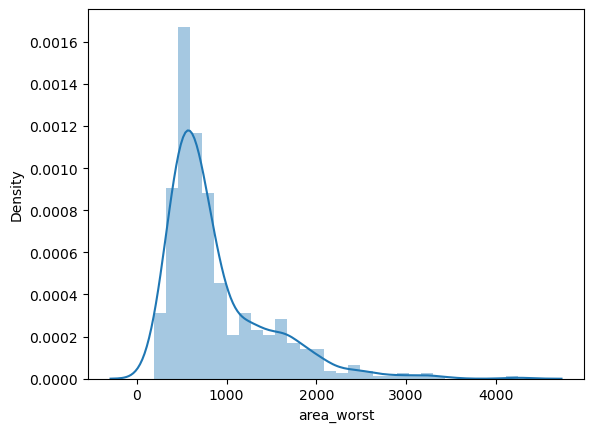

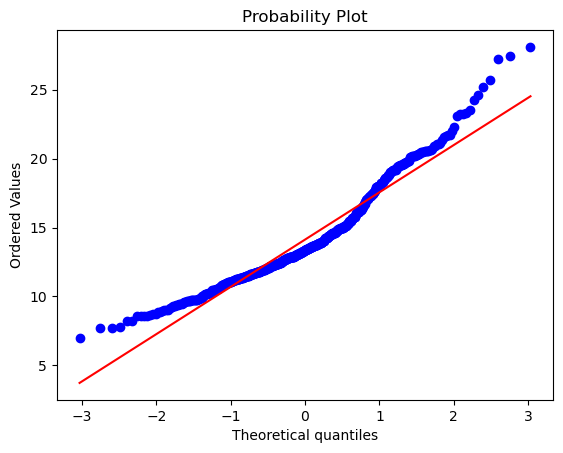

column is non-gaussian


In [118]:
check_gaussian(df['area_worst'])

<Axes: ylabel='area_worst'>

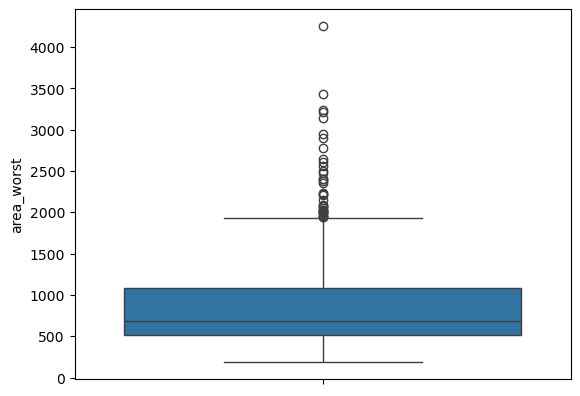

In [119]:
sns.boxplot(df['area_worst'])

In [120]:
skweness=df['area_worst'].skew()
skweness

1.8593732724433467

<Axes: xlabel='diagnosis', ylabel='area_worst'>

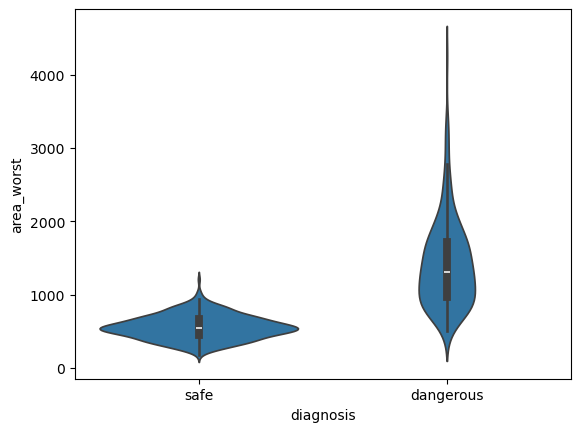

In [121]:
sns.violinplot(x='diagnosis',y='area_worst',data=df)

# area_worst
#### * The distribution is not normal mostly right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * the distribution is non-guassian
#### * ouliers are present above the 1900
#### * most of the points are concentrated in between 500 to 1300
#### * Dangerous tumours has the more median range and safe tumor has the low median range
#### * In safe tumor the tumor around median is more

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


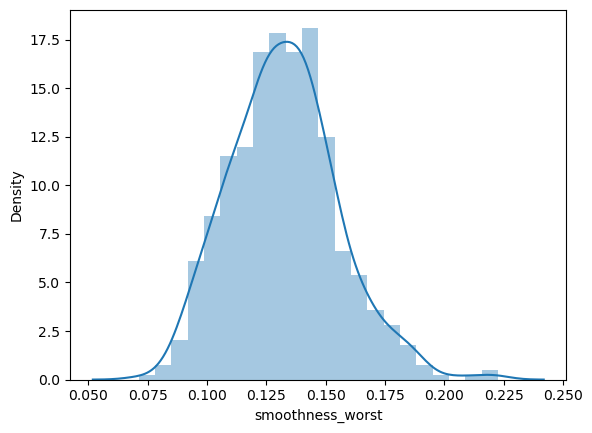

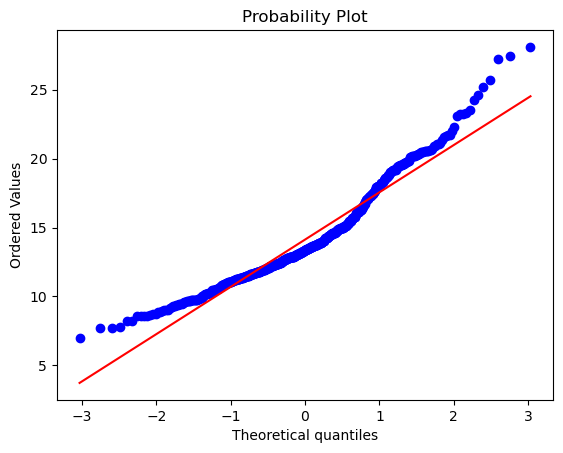

column is non-gaussian


In [122]:
check_gaussian(df['smoothness_worst'])

<Axes: ylabel='smoothness_worst'>

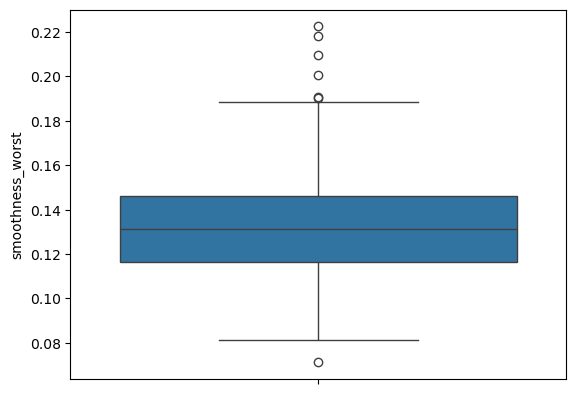

In [123]:
sns.boxplot(df['smoothness_worst'])

In [124]:
skewness=df['smoothness_worst'].skew()
skewness

0.4154259962824678

<Axes: xlabel='diagnosis', ylabel='smoothness_worst'>

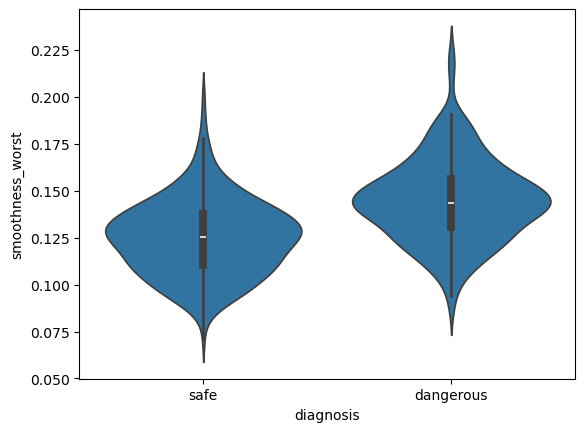

In [125]:
sns.violinplot(x='diagnosis',y='smoothness_worst',data=df)

# smoothness_worst
#### * The distribution is not normaslightly right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * the distribution is non-guassian
#### * ouliers are present above the 0.18 on both side
#### * most of the points are concentrated in between 0.11 to 0.15
#### Dangerous tumor has the slightly higher median range the safe ones
#### * In both the distribution is higher around median

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


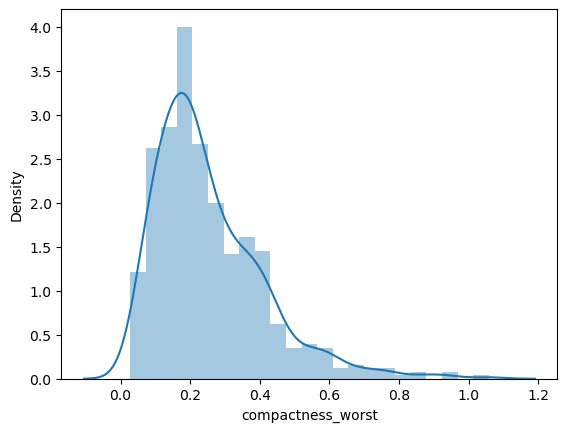

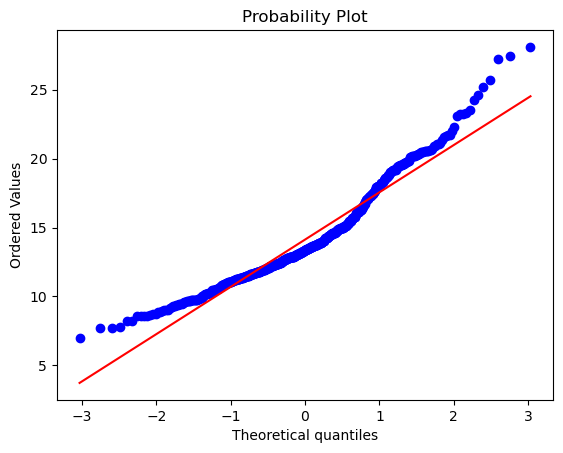

column is non-gaussian


In [126]:
check_gaussian(df['compactness_worst'])

<Axes: ylabel='compactness_worst'>

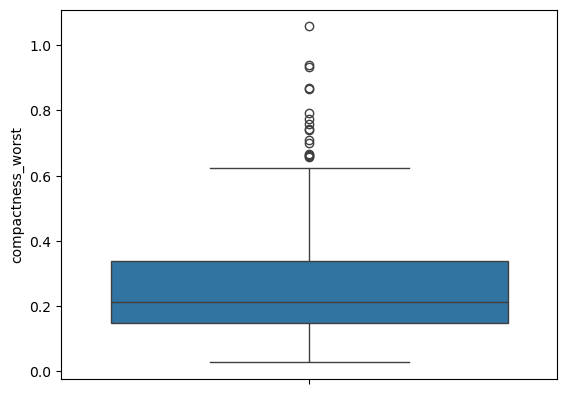

In [127]:
sns.boxplot(df['compactness_worst'])

In [128]:
skewness=df['compactness_worst'].skew()
skewness

1.4735549003297956

<Axes: xlabel='diagnosis', ylabel='compactness_worst'>

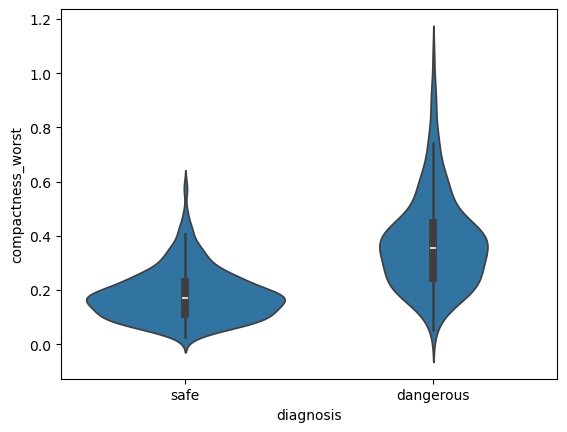

In [129]:
sns.violinplot(x='diagnosis',y='compactness_worst',data=df)

# compactness_worst
#### * The distribution is not normal heavilyy right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * the distribution is non-guassian
#### * ouliers are present above the 0.3
#### * most of the points are concentrated in between 0.1 to 0.3
#### * Dangerous tumour has the more median range
#### * safe tumour has the low median range the distribution is more around median

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


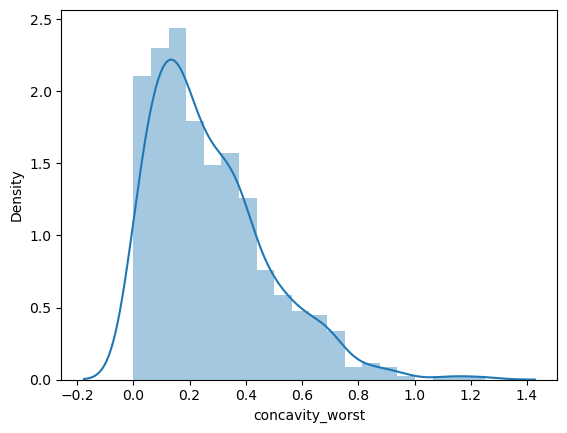

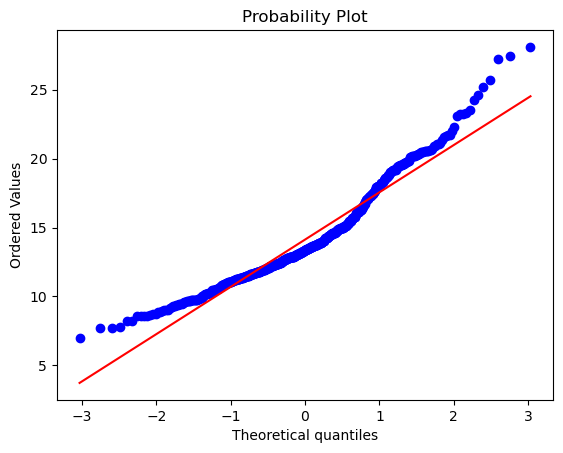

column is non-gaussian


In [130]:
check_gaussian(df['concavity_worst'])

<Axes: ylabel='concavity_worst'>

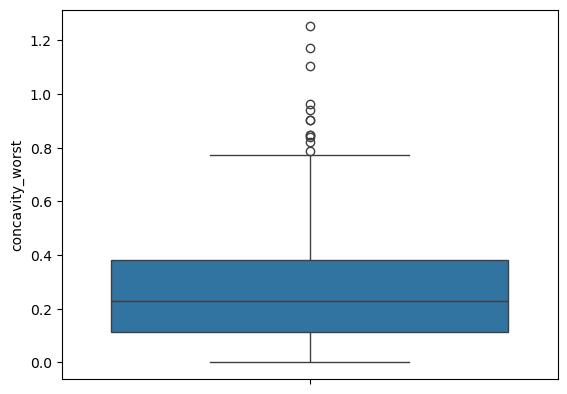

In [131]:
sns.boxplot(df['concavity_worst'])

In [132]:
skweness=df['concavity_worst'].skew()
skweness

1.1502368219460262

<Axes: xlabel='diagnosis', ylabel='concavity_worst'>

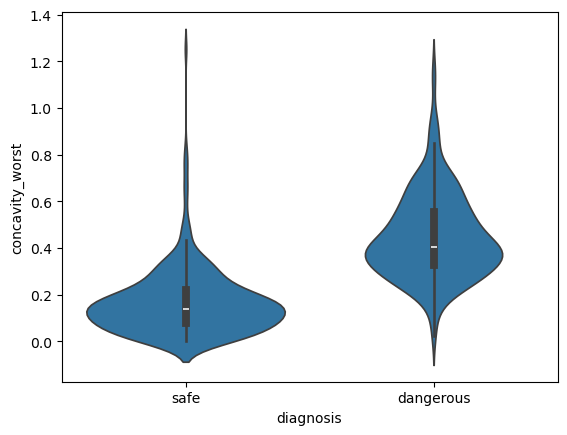

In [133]:
sns.violinplot(x='diagnosis',y='concavity_worst',data=df)

# concavity_worst
#### * The distribution is not normal heavilyy right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * the distribution is non-guassian
#### * ouliers are present above the 0.7
#### * most of the points are concentrated in between 0.1 to 0.4
#### * Dangerous tumour has the more median range than the safe ones
#### * in safe the distribution is more around median

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


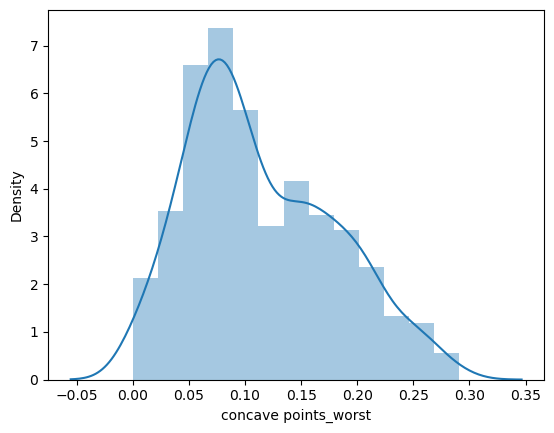

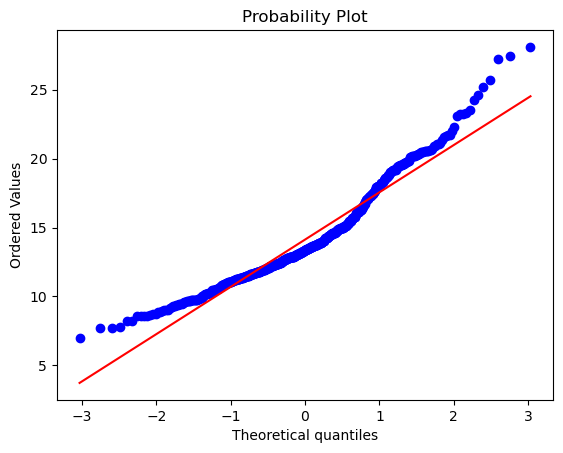

column is non-gaussian


In [134]:
check_gaussian(df['concave points_worst'])

<Axes: ylabel='concave points_worst'>

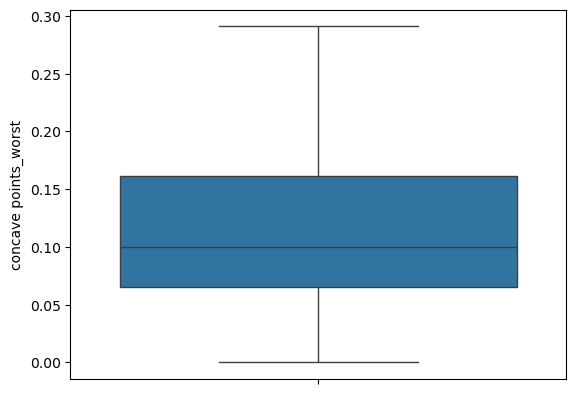

In [135]:
sns.boxplot(df['concave points_worst'])

In [136]:
skewness=df['concave points_worst'].skew()
skewness

0.49261552688550875

<Axes: xlabel='diagnosis', ylabel='concave points_worst'>

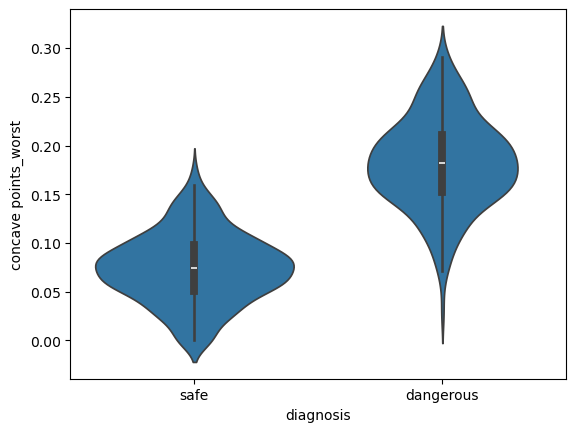

In [137]:
sns.violinplot(x='diagnosis',y='concave points_worst',data=df)

# concave points_worst
#### * The distribution is not normal slighlyy right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * the distribution is non-guassian
#### *  No outliers
#### * most of the points are concentrated in between 0..6 to 0.17
#### * Dangerous tumour has the more median range than the safe ones
#### * Both distributions are tightly packed around median

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


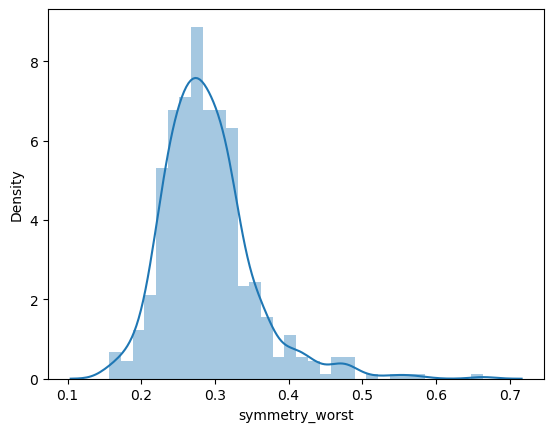

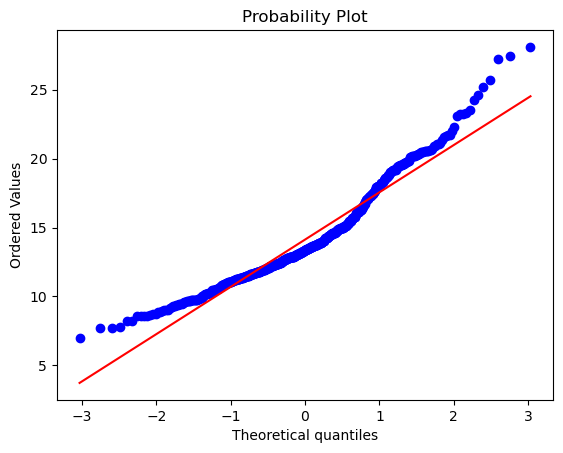

column is non-gaussian


In [138]:
check_gaussian(df['symmetry_worst'])

<Axes: ylabel='symmetry_worst'>

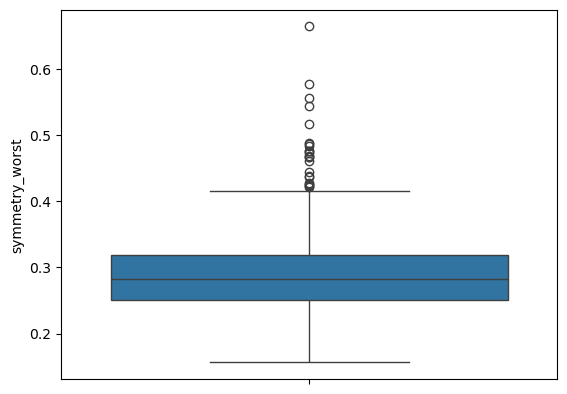

In [139]:
sns.boxplot(df['symmetry_worst'])

In [140]:
skweness=df['symmetry_worst'].skew()
skweness

1.433927765189328

<Axes: xlabel='diagnosis', ylabel='symmetry_worst'>

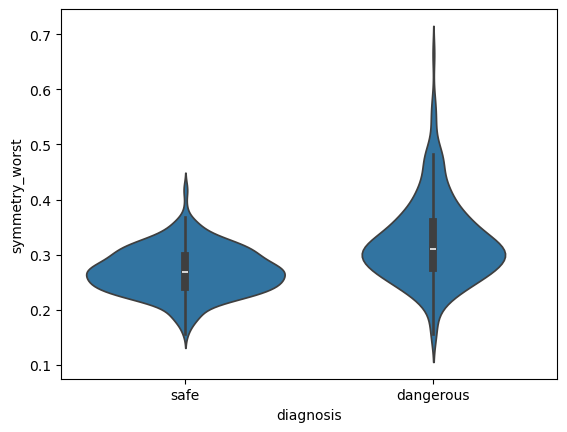

In [141]:
sns.violinplot(x='diagnosis',y='symmetry_worst',data=df)

# symmetry_worst
#### * The distribution is not normal HEAVILyy right skewed
#### *  Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
####  * The distribution is non-guassian
#### * outliers are present above 0.4
#### * most of the pointS are concentrated in between 0.2 to 0.4
#### * Dangerous Tumor is slghtly higher tthan the safe ones

C:\Users\shiva\AppData\Local\Temp\ipykernel_3964\116793748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True)


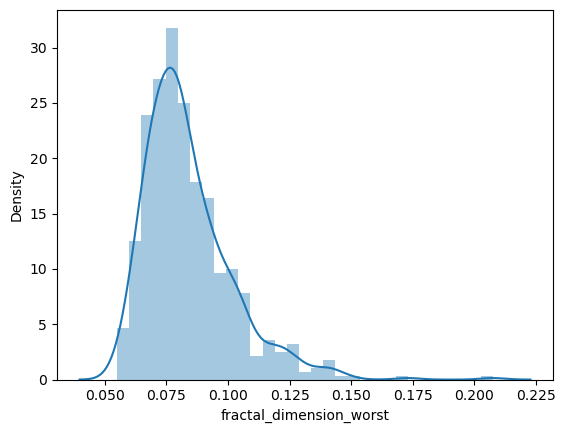

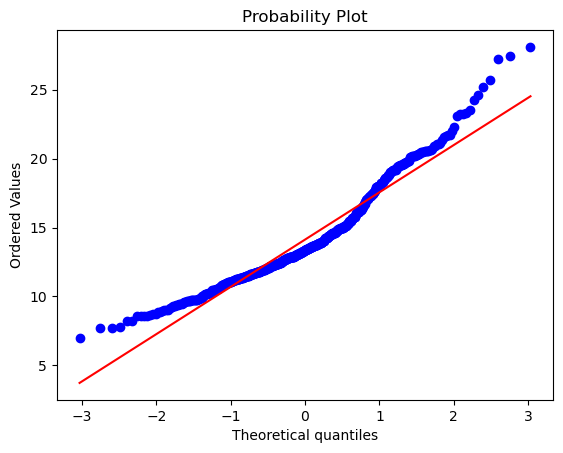

column is non-gaussian


In [142]:
check_gaussian(df['fractal_dimension_worst'])

<Axes: ylabel='fractal_dimension_worst'>

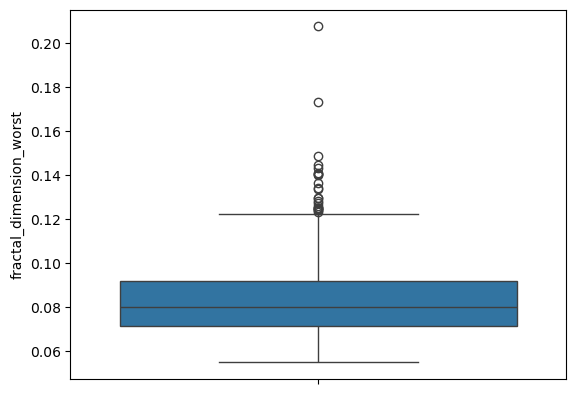

In [143]:
sns.boxplot(df['fractal_dimension_worst'])

In [144]:
skewness=df['fractal_dimension_worst'].skew()
skewness

1.6625792663955146

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_worst'>

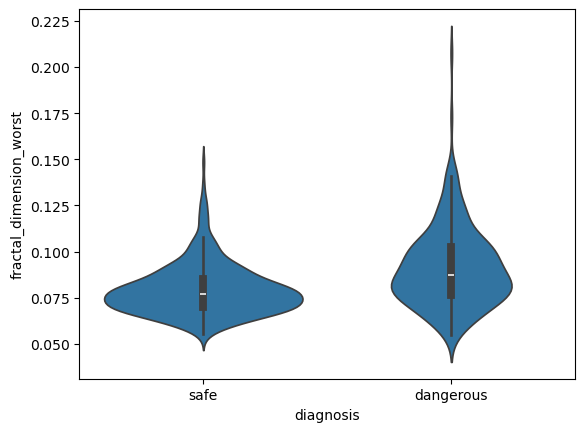

In [145]:
sns.violinplot(x='diagnosis',y='fractal_dimension_worst',data=df)

# fractal_dimension_worst
#### * The distribution is not normal HEAVILyy right skewed
#### * Q-Q plot indicates that the points are deviated from the normal line especially in the upper tails
#### * The distribution is non-guassian
#### * outliers are present above 0.12
#### * most of the pointS are concentrated in between 0.7 to 0.9
#### * Dangerous tumours is slightly higher median range than the safe ones

In [146]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['radius_mean_scaled'] = scaler.fit_transform(df[['radius_mean']])

In [147]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'radius_mean_scaled'],
      dtype='object')

In [148]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    dangerous        17.99         10.38          122.80     1001.0   
1    dangerous        20.57         17.77          132.90     1326.0   
2    dangerous        19.69         21.25          130.00     1203.0   
3    dangerous        11.42         20.38           77.58      386.1   
4    dangerous        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564  dangerous        21.56         22.39          142.00     1479.0   
565  dangerous        20.13         28.25          131.20     1261.0   
566  dangerous        16.60         28.08          108.30      858.1   
567  dangerous        20.60         29.33          140.10     1265.0   
568       safe         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572    

In [149]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [150]:
features_to_scale = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
    'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst']

In [151]:
scaler

RobustScaler()

In [152]:
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [153]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    dangerous     1.132353     -1.502664        1.263740   1.241446   
1    dangerous     1.764706     -0.190053        1.612859   2.138245   
2    dangerous     1.549020      0.428064        1.512617   1.798841   
3    dangerous    -0.477941      0.273535       -0.299343  -0.455298   
4    dangerous     1.696078     -0.799290        1.688904   2.058223   
..         ...          ...           ...             ...        ...   
564  dangerous     2.007353      0.630551        1.927411   2.560430   
565  dangerous     1.656863      1.671403        1.554096   1.958885   
566  dangerous     0.791667      1.641208        0.762530   0.847130   
567  dangerous     1.772059      1.863233        1.861735   1.969923   
568       safe    -1.375000      1.012433       -1.324577  -1.021247   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.190174          2.824832        2.358711             2.115850   
1          -0.587956         -0.213653        0.250742             0.682995   
2           0.725304          1.027337        1.343287             1.758242   
3           2.463286          2.921045        1.778327             1.335444   
4           0.234020          0.613470        1.349219             1.318681   
..               ...               ...             ...                  ...   
564         0.799260          0.355376        1.803045             1.963122   
565         0.101955          0.164478        0.815306             1.199665   
566        -0.597993          0.147679        0.306209             0.363569   
567         1.158479          2.815669        2.865928             2.207115   
568        -2.284205         -0.748473       -0.608464            -0.623952   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         1.855030  ...      -0.935185         2.105595    2.343063   
1         0.059172  ...      -0.231481         1.480746    2.232284   
2         0.819527  ...       0.013889         1.328167    1.797960   
3         2.381657  ...       0.126157         0.029305   -0.208897   
4         0.050296  ...      -1.011574         1.320901    1.562335   
..             ...  ...            ...              ...         ...   
564      -0.195266  ...       0.114583         1.657544    2.357130   
565      -0.118343  ...       1.486111         1.388714    1.836645   
566      -0.597633  ...       1.008102         0.703318    0.769298   
567       1.789941  ...       1.621528         2.105595    1.994901   
568      -0.606509  ...       0.574074        -0.932429   -0.734834   

     smoothness_worst  compactness_worst  concavity_worst  \
0            1.051020           2.364252         1.807750   
1           -0.255102          -0.131839         0.055514   
2            0.445578           1.107869         0.833458   
3            2.670068           3.410109         1.714605   
4            0.207483          -0.035956         0.645678   
..                ...                ...              ...   
564          0.329932          -0.003127         0.685544   
565         -0.500000          -0.102658         0.353204   
566         -0.591837           0.508077         0.423249   
567          1.146259           3.419489         2.652757   
568         -1.406122          -0.768421        -0.844635   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                1.715248        2.635556                 1.884578   
1                0.892194       -0.106667                 0.435500   
2                1.483052        1.171852                 0.365664   
3                1.633358        5.653333                 4.508244   
4                0.648595       -0.678519                -0.158099   
..                    ...             ...                      ...   
564              1.261221       -1.128889                -0.431135   
565              0.651705       -0.370370    

# Bivariant analysis

In [154]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'radius_mean_scaled'],
      dtype='object')

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

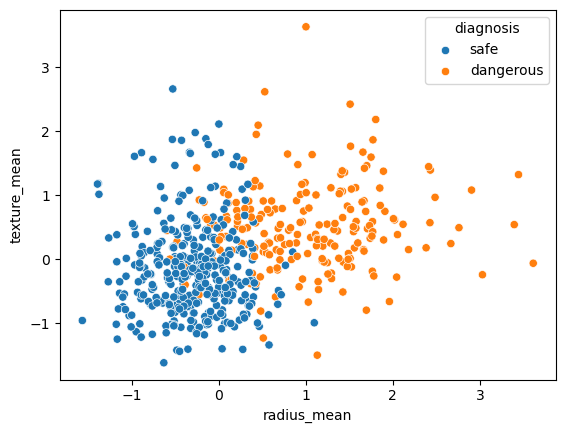

In [155]:
sns.scatterplot(data=df,x='radius_mean',y='texture_mean',hue='diagnosis')

<Axes: xlabel='perimeter_mean', ylabel='area_mean'>

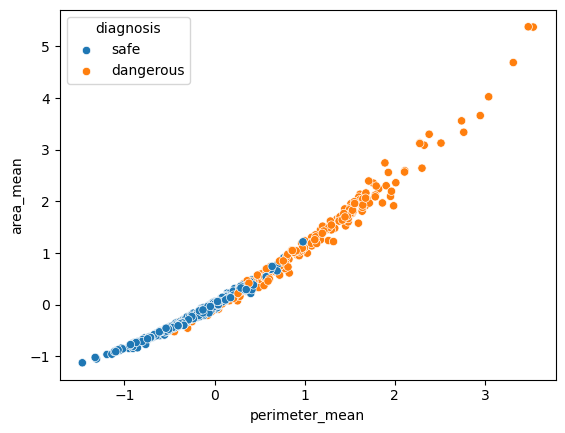

In [156]:
sns.scatterplot(data=df,x='perimeter_mean',y='area_mean',hue='diagnosis')

<Axes: xlabel='radius_se', ylabel='texture_se'>

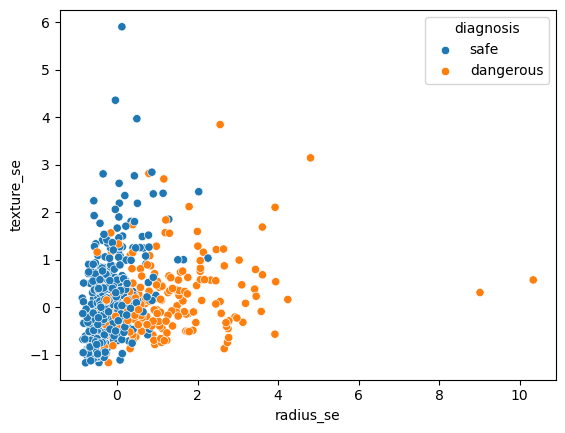

In [157]:
sns.scatterplot(data=df,x='radius_se',y='texture_se',hue='diagnosis')

<Axes: xlabel='compactness_mean', ylabel='compactness_mean'>

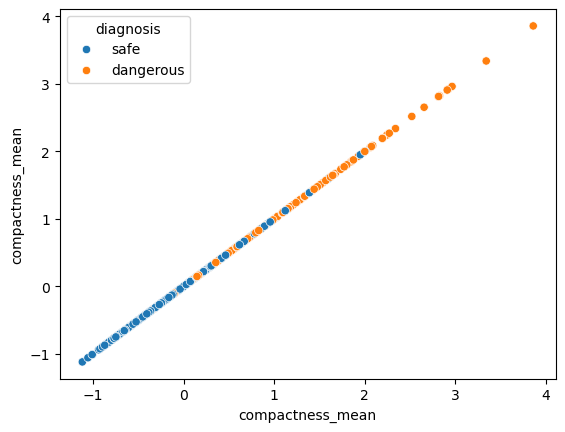

In [158]:
sns.scatterplot(data=df,x='compactness_mean',y='compactness_mean',hue='diagnosis')

In [159]:
safe=df[df['diagnosis']=='safe']['radius_mean']
dangerous=df[df['diagnosis']=='dangerous']['radius_mean']

In [160]:
# p_val<0.05---reject H0
# p_value>o.o5---->


In [161]:
from scipy.stats import ttest_ind
t_stats,p_val=ttest_ind(safe,dangerous,alternative='less')

In [162]:
p_val

4.232970286131573e-96

### As p value is less than 0.05 we can reject H0
### we can conclude there is a statistically significant difference between in the feautre between the two diagnosis grops

In [163]:
t_stats,p_val=ttest_ind(safe,dangerous,alternative='greater')

In [164]:
p_val

1.0

### As p value is less than 0.05 we can reject H0
### we can conclude there is a statistically significant difference in the feautre between the two diagnosis grops safe and unsafe

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

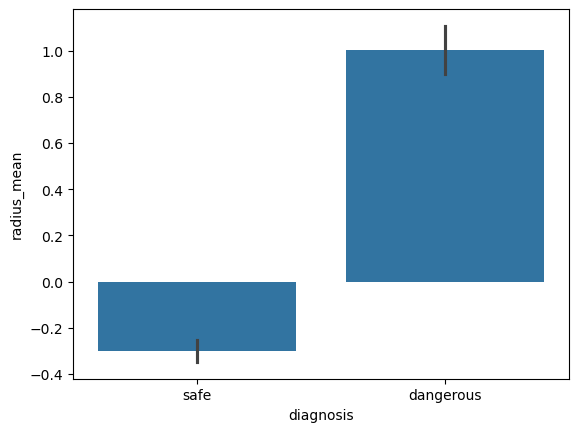

In [165]:
sns.barplot(x=df['diagnosis'],y=df['radius_mean'])

### The dangerous group has much higher avergae radius_mean value
### the safe group has a lower radius_meean
### The black lines on the top of each bar represent the confidence interval

In [166]:
safe=df[df['diagnosis']=='safe']['texture_mean']
dangerous=df[df['diagnosis']=='dangerous']['texture_mean']

In [167]:
t_test,p_val=ttest_ind(safe,dangerous,alternative='less')

In [168]:
p_val

2.0293180239490806e-25

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

In [169]:
t_test,p_val=ttest_ind(safe,dangerous,alternative='greater')

In [170]:
p_val

1.0

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

<Axes: xlabel='diagnosis', ylabel='texture_mean'>

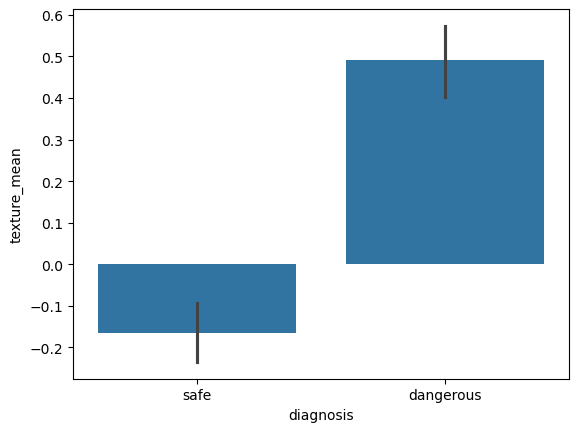

In [171]:
sns.barplot(x=df['diagnosis'],y=df['texture_mean'],data=df)

### The dangerous group has much higher average texture_mean value
### The safe group has lower average of texture_mean value

In [172]:
safe=df[df['diagnosis']=='safe']['perimeter_mean']
dangerous=df[df['diagnosis']=='dangerous']['perimeter_mean']

In [173]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [174]:
p

4.218125518086765e-101

In [175]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [176]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

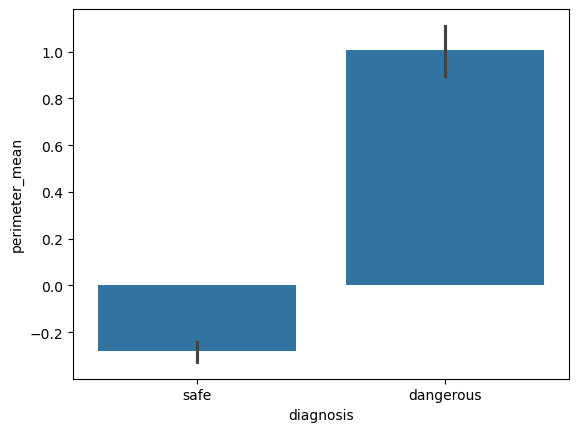

In [177]:
sns.barplot(x=df['diagnosis'],y=df['perimeter_mean'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average perimeter_mean value
### The safe group has lower average of perimeter_mean value

In [178]:
safe=df[df['diagnosis']=='safe']['area_mean']
dangerous=df[df['diagnosis']=='dangerous']['area_mean']


In [179]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [180]:
p

2.367282155153672e-88

In [181]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [182]:
p

1.0

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average area_mean value
### The safe group has lower average of area_mean value

In [183]:
safe=df[df['diagnosis']=='safe']['smoothness_mean']
dangerous=df[df['diagnosis']=='dangerous']['smoothness_mean']


In [184]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [185]:
p

5.259251796016234e-19

In [186]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [187]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='smoothness_mean'>

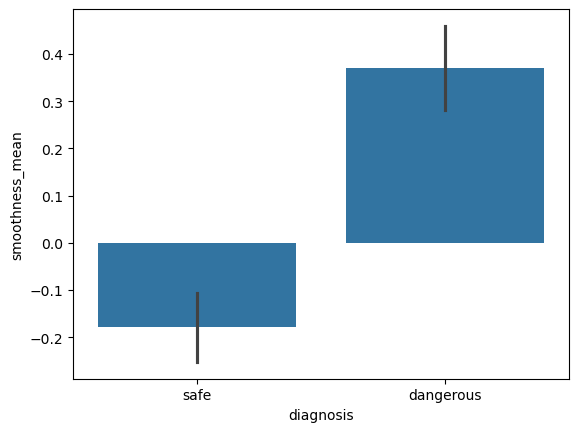

In [188]:
sns.barplot(x=df['diagnosis'],y=df['smoothness_mean'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average area_mean value
### The safe group has lower average of area_mean value

In [189]:
safe=df[df['diagnosis']=='safe']['compactness_mean']
dangerous=df[df['diagnosis']=='dangerous']['compactness_mean']


In [190]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [191]:
p

1.9691315529436948e-56

In [192]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [193]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='compactness_mean'>

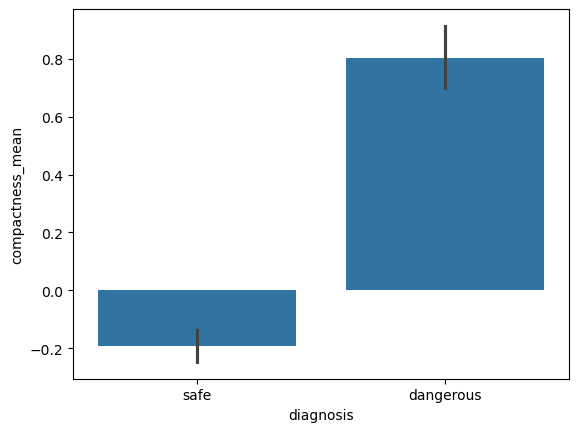

In [194]:
sns.barplot(x=df['diagnosis'],y=df['compactness_mean'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average compactness_mean value
### The safe group has lower average of compactness_mean value

In [195]:
safe=df[df['diagnosis']=='safe']['concavity_mean']
dangerous=df[df['diagnosis']=='dangerous']['concavity_mean']


In [196]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [197]:
p

4.983277877536765e-84

In [198]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [199]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='concavity_mean'>

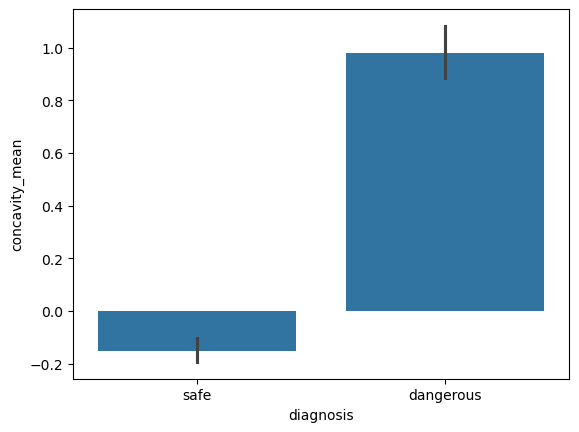

In [200]:
sns.barplot(x=df['diagnosis'],y=df['concavity_mean'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average compactness_mean value
### The safe group has lower average of compactness_mean value

In [201]:
safe=df[df['diagnosis']=='safe']['concave points_mean']
dangerous=df[df['diagnosis']=='dangerous']['concave points_mean']


In [202]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [203]:
p

3.550575080528508e-116

In [204]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [205]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='concave points_mean'>

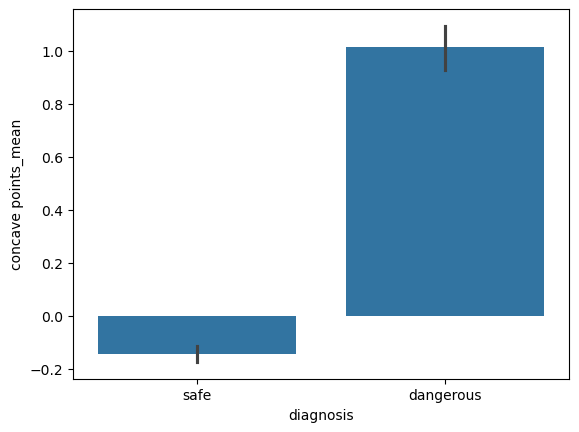

In [206]:
sns.barplot(x=df['diagnosis'],y=df['concave points_mean'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average concave points_mean value
### The safe group has lower average of concave points_mean value

In [207]:
safe=df[df['diagnosis']=='safe']['symmetry_mean']
dangerous=df[df['diagnosis']=='dangerous']['symmetry_mean']


In [208]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [209]:
p

2.866692014233372e-16

In [210]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [211]:
p

0.9999999999999998

<Axes: xlabel='diagnosis', ylabel='symmetry_mean'>

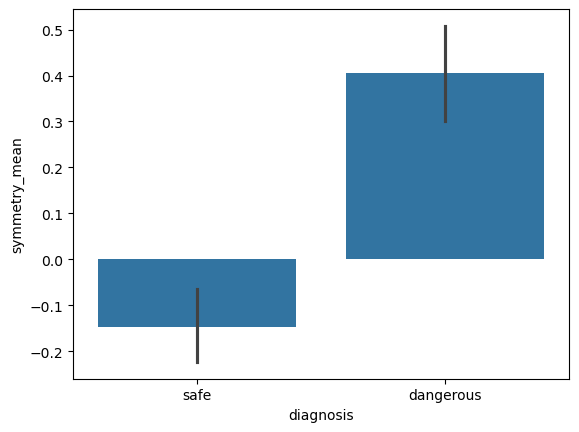

In [212]:
sns.barplot(x=df['diagnosis'],y=df['symmetry_mean'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average symmetry_mean value
### The safe group has lower average of symmetry_mean value

In [213]:
safe=df[df['diagnosis']=='safe']['fractal_dimension_mean']
dangerous=df[df['diagnosis']=='dangerous']['fractal_dimension_mean']


In [214]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [215]:
p

0.6200315981371837

In [216]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [217]:
p

0.37996840186281633

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_mean'>

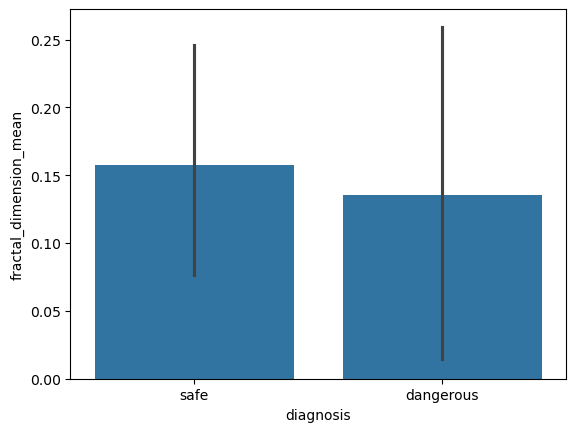

In [218]:
sns.barplot(x=df['diagnosis'],y=df['fractal_dimension_mean'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### we can conclude that average of fractal_dimension_mean of safe greater than or equal to the dangerous

In [219]:
safe=df[df['diagnosis']=='safe']['radius_se']
dangerous=df[df['diagnosis']=='dangerous']['radius_se']


In [220]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [221]:
p

4.869474328230545e-50

In [222]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [223]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='radius_se'>

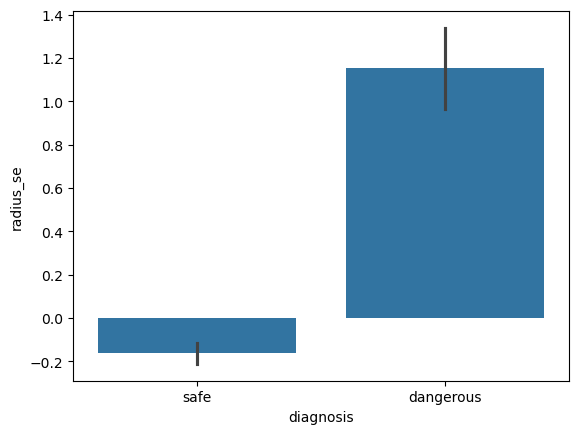

In [224]:
sns.barplot(x=df['diagnosis'],y=df['radius_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_se value
### The safe group has lower average of radius_se value

In [225]:
safe=df[df['diagnosis']=='safe']['texture_se']
dangerous=df[df['diagnosis']=='dangerous']['texture_se']


In [226]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [227]:
p

0.5783339856164909

In [228]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [229]:
p

0.42166601438350915

<Axes: xlabel='diagnosis', ylabel='texture_se'>

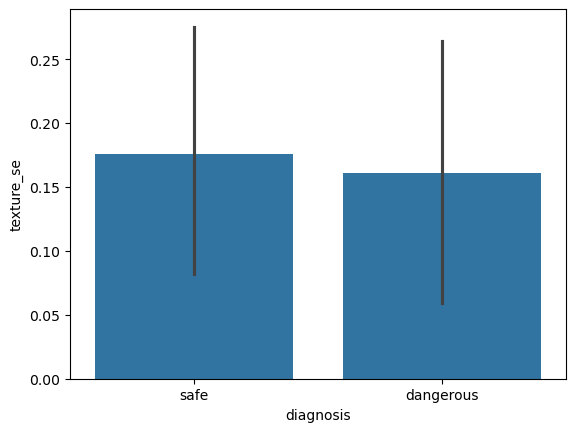

In [230]:
sns.barplot(x=df['diagnosis'],y=df['texture_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_se level of safe and dangerous

### we can conclude that average of texture_se  safe greater than or equal to the dangerous

In [231]:
safe=df[df['diagnosis']=='safe']['perimeter_se']
dangerous=df[df['diagnosis']=='dangerous']['perimeter_se']


In [232]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [233]:
p

8.259525879248675e-48

In [234]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [235]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='perimeter_se'>

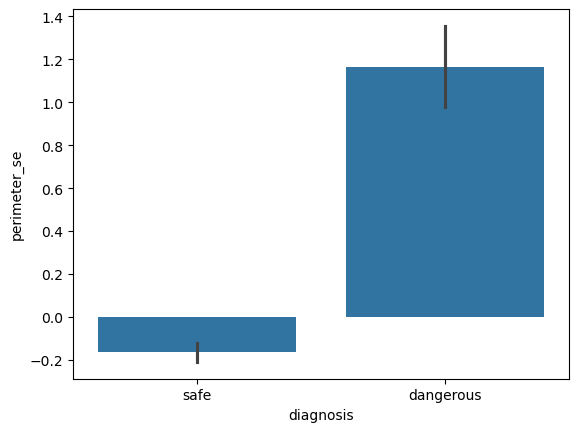

In [236]:
sns.barplot(x=df['diagnosis'],y=df['perimeter_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average perimeter_se value
### The safe group has lower average of perimeter_se value

In [237]:
safe=df[df['diagnosis']=='safe']['area_se']
dangerous=df[df['diagnosis']=='dangerous']['area_se']


In [238]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [239]:
p

2.947760696302932e-46

In [240]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [241]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='area_se'>

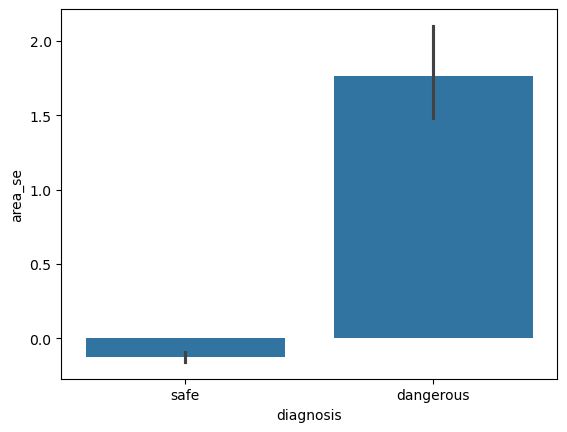

In [242]:
sns.barplot(x=df['diagnosis'],y=df['area_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average area_se value
### The safe group has lower average of area_se value

In [243]:
safe=df[df['diagnosis']=='safe']['smoothness_se']
dangerous=df[df['diagnosis']=='dangerous']['smoothness_se']


In [244]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [245]:
p

0.9448516956710538

In [246]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [247]:
p

0.05514830432894617

<Axes: xlabel='diagnosis', ylabel='smoothness_se'>

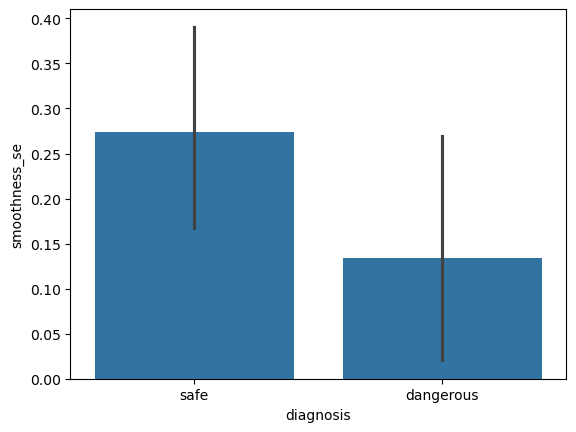

In [248]:
sns.barplot(x=df['diagnosis'],y=df['smoothness_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The safe  group has much higher average smoothness_se value
### The dangerous group has lower average of smoothness_se value

In [249]:
safe=df[df['diagnosis']=='safe']['compactness_se']
dangerous=df[df['diagnosis']=='dangerous']['compactness_se']


In [250]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [251]:
p

4.987997327037383e-13

In [252]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [253]:
p

0.9999999999995012

<Axes: xlabel='diagnosis', ylabel='compactness_se'>

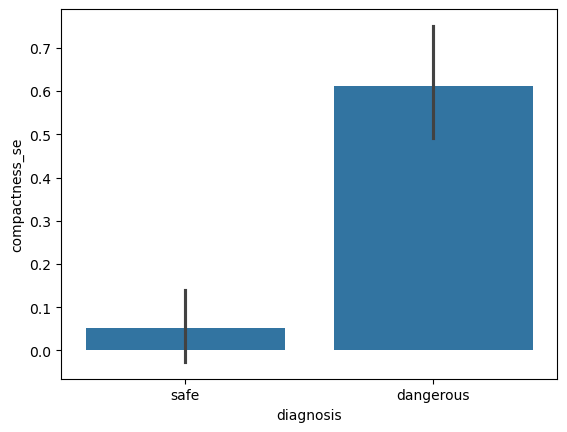

In [254]:
sns.barplot(x=df['diagnosis'],y=df['compactness_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average compactness_se value
### The safe group has lower average of compactness_se value

In [255]:
safe=df[df['diagnosis']=='safe']['concavity_se']
dangerous=df[df['diagnosis']=='dangerous']['concavity_se']


In [256]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [257]:
p

4.130088083985056e-10

In [258]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [259]:
p

0.9999999995869912

<Axes: xlabel='diagnosis', ylabel='concavity_se'>

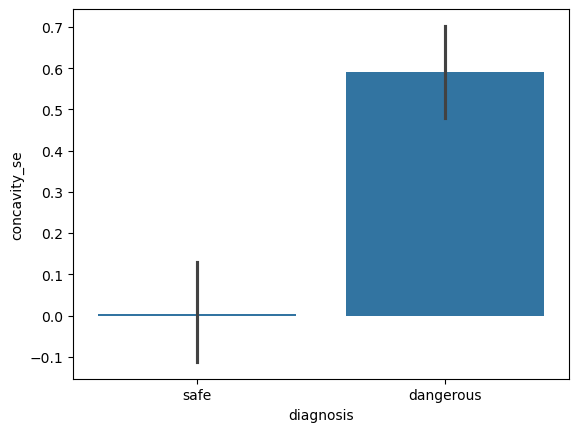

In [260]:
sns.barplot(x=df['diagnosis'],y=df['concavity_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous
### dangerous group has a much higher mean concavity_se (around 0.6).

### safe group has a mean close to 0.

In [261]:
safe=df[df['diagnosis']=='safe']['concave points_mean']
dangerous=df[df['diagnosis']=='dangerous']['concave points_mean']


In [262]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [263]:
p

3.550575080528508e-116

In [264]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [265]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='concave points_mean'>

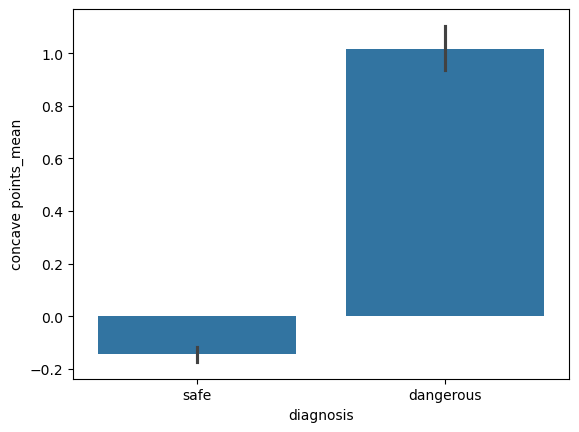

In [266]:
sns.barplot(x=df['diagnosis'],y=df['concave points_mean'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average concave points_mean value
### The safe group has lower average of concave points_mean value

In [267]:
safe=df[df['diagnosis']=='safe']['symmetry_se']
dangerous=df[df['diagnosis']=='dangerous']['symmetry_se']


In [268]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [269]:
p

0.5616790908070601

In [270]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [271]:
p

0.4383209091929398

<Axes: xlabel='diagnosis', ylabel='symmetry_se'>

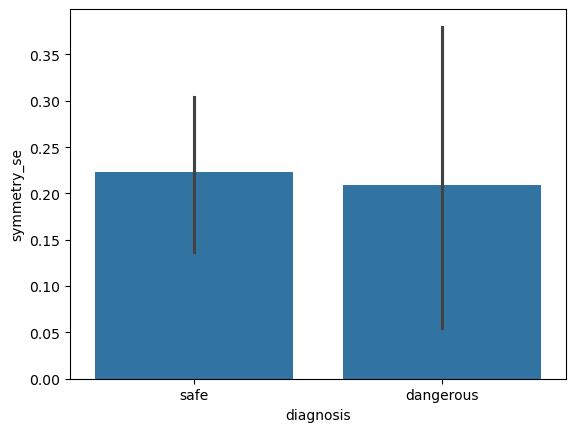

In [272]:
sns.barplot(x=df['diagnosis'],y=df['symmetry_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between symmetry_se level of safe and dangerous

### we can conclude that average of symmetry_se  safe greater than or equal to the dangerous

In [273]:
safe=df[df['diagnosis']=='safe']['fractal_dimension_se']
dangerous=df[df['diagnosis']=='dangerous']['fractal_dimension_se']


In [274]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [275]:
p

0.03153677541119682

In [276]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [277]:
p

0.9684632245888032

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_se'>

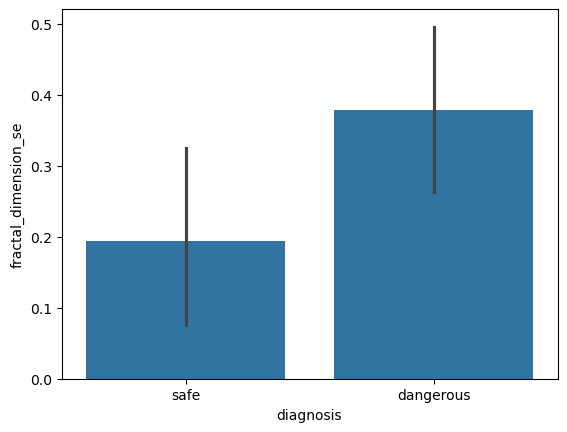

In [278]:
sns.barplot(x=df['diagnosis'],y=df['fractal_dimension_se'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average fractal_dimension_se value
### The safe group has lower average of fractal_dimension_se value

In [279]:
safe=df[df['diagnosis']=='safe']['radius_worst']
dangerous=df[df['diagnosis']=='dangerous']['radius_worst']


In [280]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [281]:
p

4.241145960842207e-116

In [282]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [283]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='radius_worst'>

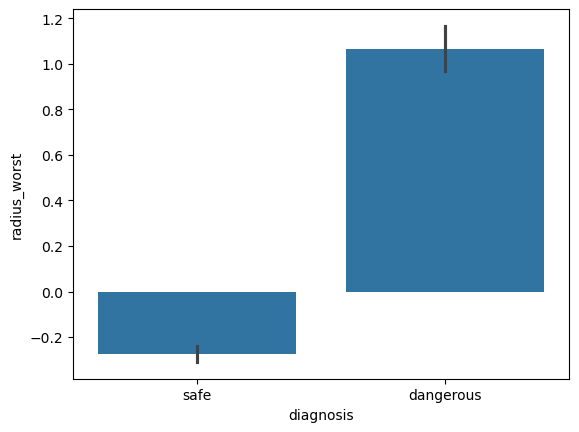

In [284]:
sns.barplot(x=df['diagnosis'],y=df['radius_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [285]:
safe=df[df['diagnosis']=='safe']['texture_worst']
dangerous=df[df['diagnosis']=='dangerous']['texture_worst']


In [286]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [287]:
p

5.390287439746657e-31

In [288]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [289]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='texture_worst'>

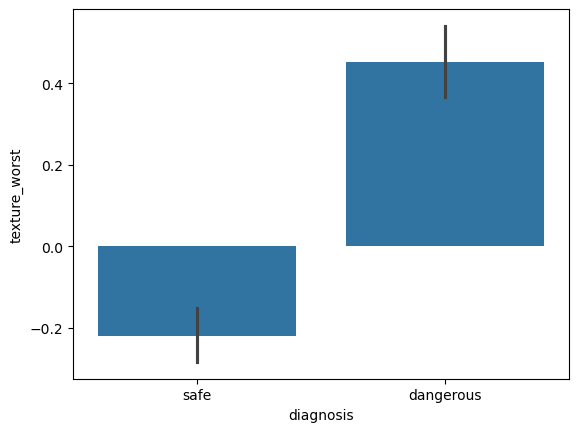

In [290]:
sns.barplot(x=df['diagnosis'],y=df['texture_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [291]:
safe=df[df['diagnosis']=='safe']['perimeter_worst']
dangerous=df[df['diagnosis']=='dangerous']['perimeter_worst']


In [292]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [293]:
p

2.885698569834474e-119

In [294]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [295]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='perimeter_worst'>

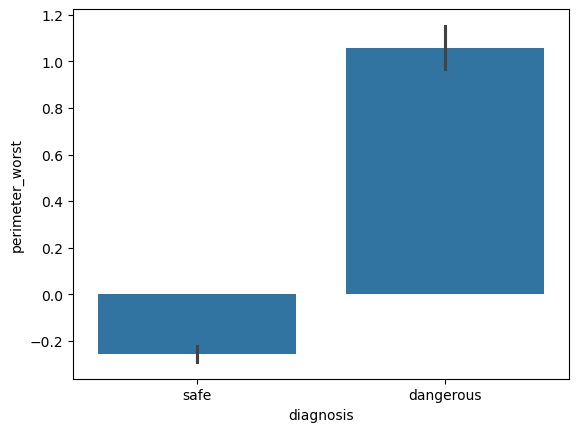

In [296]:
sns.barplot(x=df['diagnosis'],y=df['perimeter_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [297]:
safe=df[df['diagnosis']=='safe']['area_worst']
dangerous=df[df['diagnosis']=='dangerous']['area_worst']

In [298]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [299]:
p

1.4144238521433466e-97

In [300]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [301]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='perimeter_worst'>

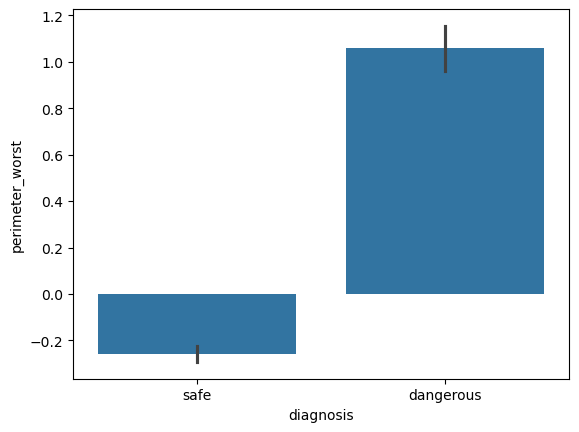

In [302]:
sns.barplot(x=df['diagnosis'],y=df['perimeter_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [303]:
safe=df[df['diagnosis']=='safe']['smoothness_worst']
dangerous=df[df['diagnosis']=='dangerous']['smoothness_worst']


In [304]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [305]:
p

3.287571816992125e-26

In [306]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [307]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='smoothness_worst'>

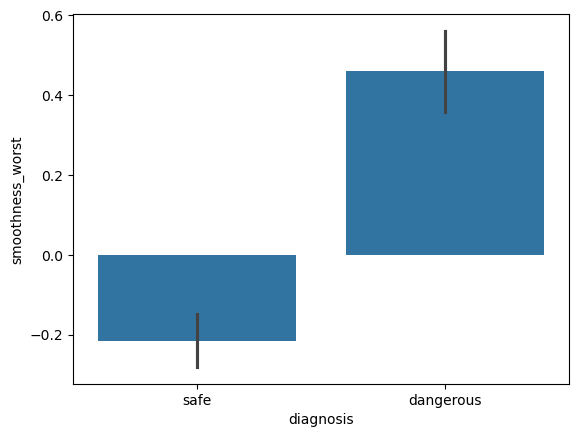

In [308]:
sns.barplot(x=df['diagnosis'],y=df['smoothness_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [309]:
safe=df[df['diagnosis']=='safe']['compactness_worst']
dangerous=df[df['diagnosis']=='dangerous']['compactness_worst']


In [310]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [311]:
p

3.534908176269188e-55

In [312]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [313]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='compactness_worst'>

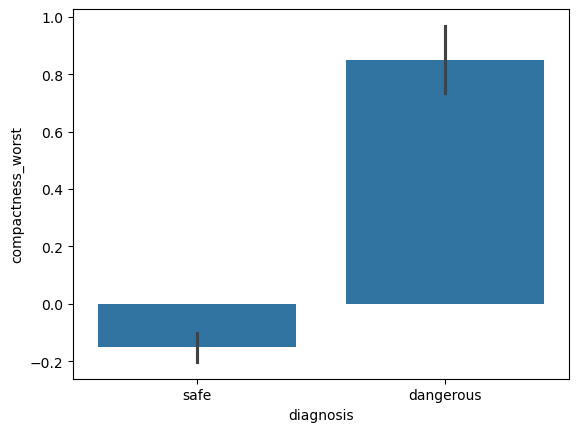

In [314]:
sns.barplot(x=df['diagnosis'],y=df['compactness_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [315]:
safe=df[df['diagnosis']=='safe']['concavity_worst']
dangerous=df[df['diagnosis']=='dangerous']['concavity_worst']


In [316]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [317]:
p

1.232331978391391e-72

In [318]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [319]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='concavity_worst'>

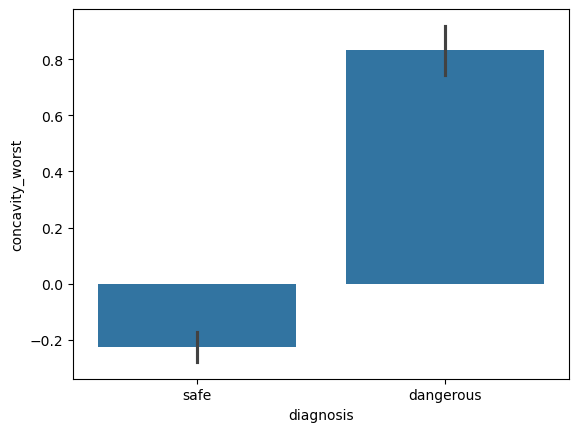

In [320]:
sns.barplot(x=df['diagnosis'],y=df['concavity_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [321]:
safe=df[df['diagnosis']=='safe']['concave points_worst']
dangerous=df[df['diagnosis']=='dangerous']['concave points_worst']


In [322]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [323]:
p

9.845498536082187e-125

In [324]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [325]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='concave points_worst'>

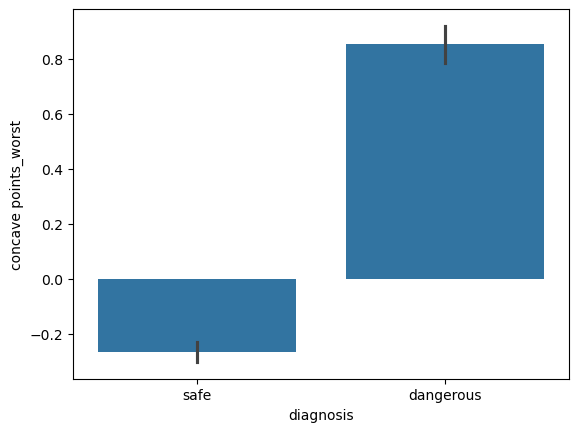

In [326]:
sns.barplot(x=df['diagnosis'],y=df['concave points_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [327]:
safe=df[df['diagnosis']=='safe']['symmetry_worst']
dangerous=df[df['diagnosis']=='dangerous']['symmetry_worst']


In [328]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [329]:
p

1.475560288576945e-25

In [330]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [331]:
p

1.0

<Axes: xlabel='diagnosis', ylabel='symmetry_worst'>

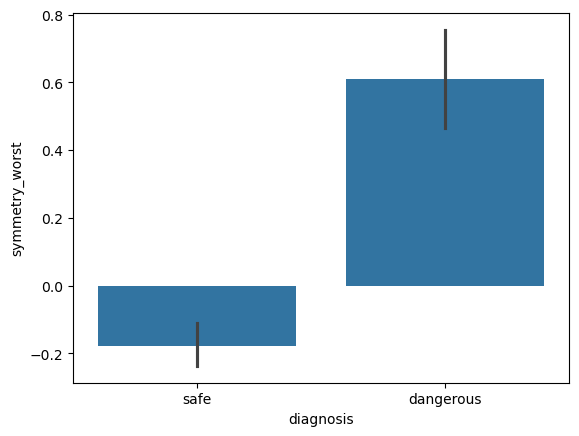

In [332]:
sns.barplot(x=df['diagnosis'],y=df['symmetry_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

In [333]:
safe=df[df['diagnosis']=='safe']['fractal_dimension_worst']
dangerous=df[df['diagnosis']=='dangerous']['fractal_dimension_worst']


In [334]:
t_test,p=ttest_ind(safe,dangerous,alternative='less')

In [335]:
p

1.1582162249914144e-15

In [336]:
t_test,p=ttest_ind(safe,dangerous,alternative='greater')

In [337]:
p

0.9999999999999988

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_worst'>

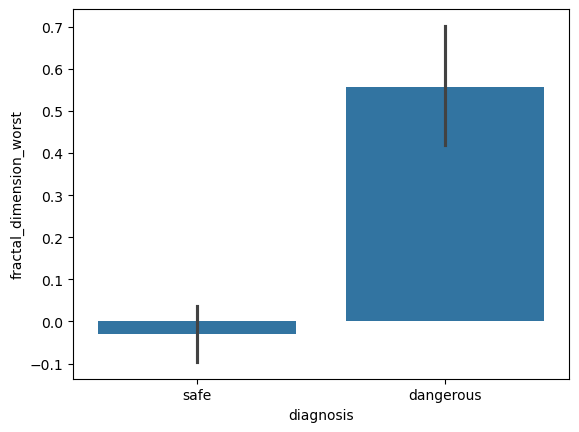

In [338]:
sns.barplot(x=df['diagnosis'],y=df['fractal_dimension_worst'])

### As p value is less than 0.05 we can reject H0
### we can conclude that there is statitically significant difference between texture_mean level of safe and dangerous

### The dangerous group has much higher average radius_worst value
### The safe group has lower average of radius_worst value

# Multivariant analysis

In [339]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'radius_mean_scaled'],
      dtype='object')

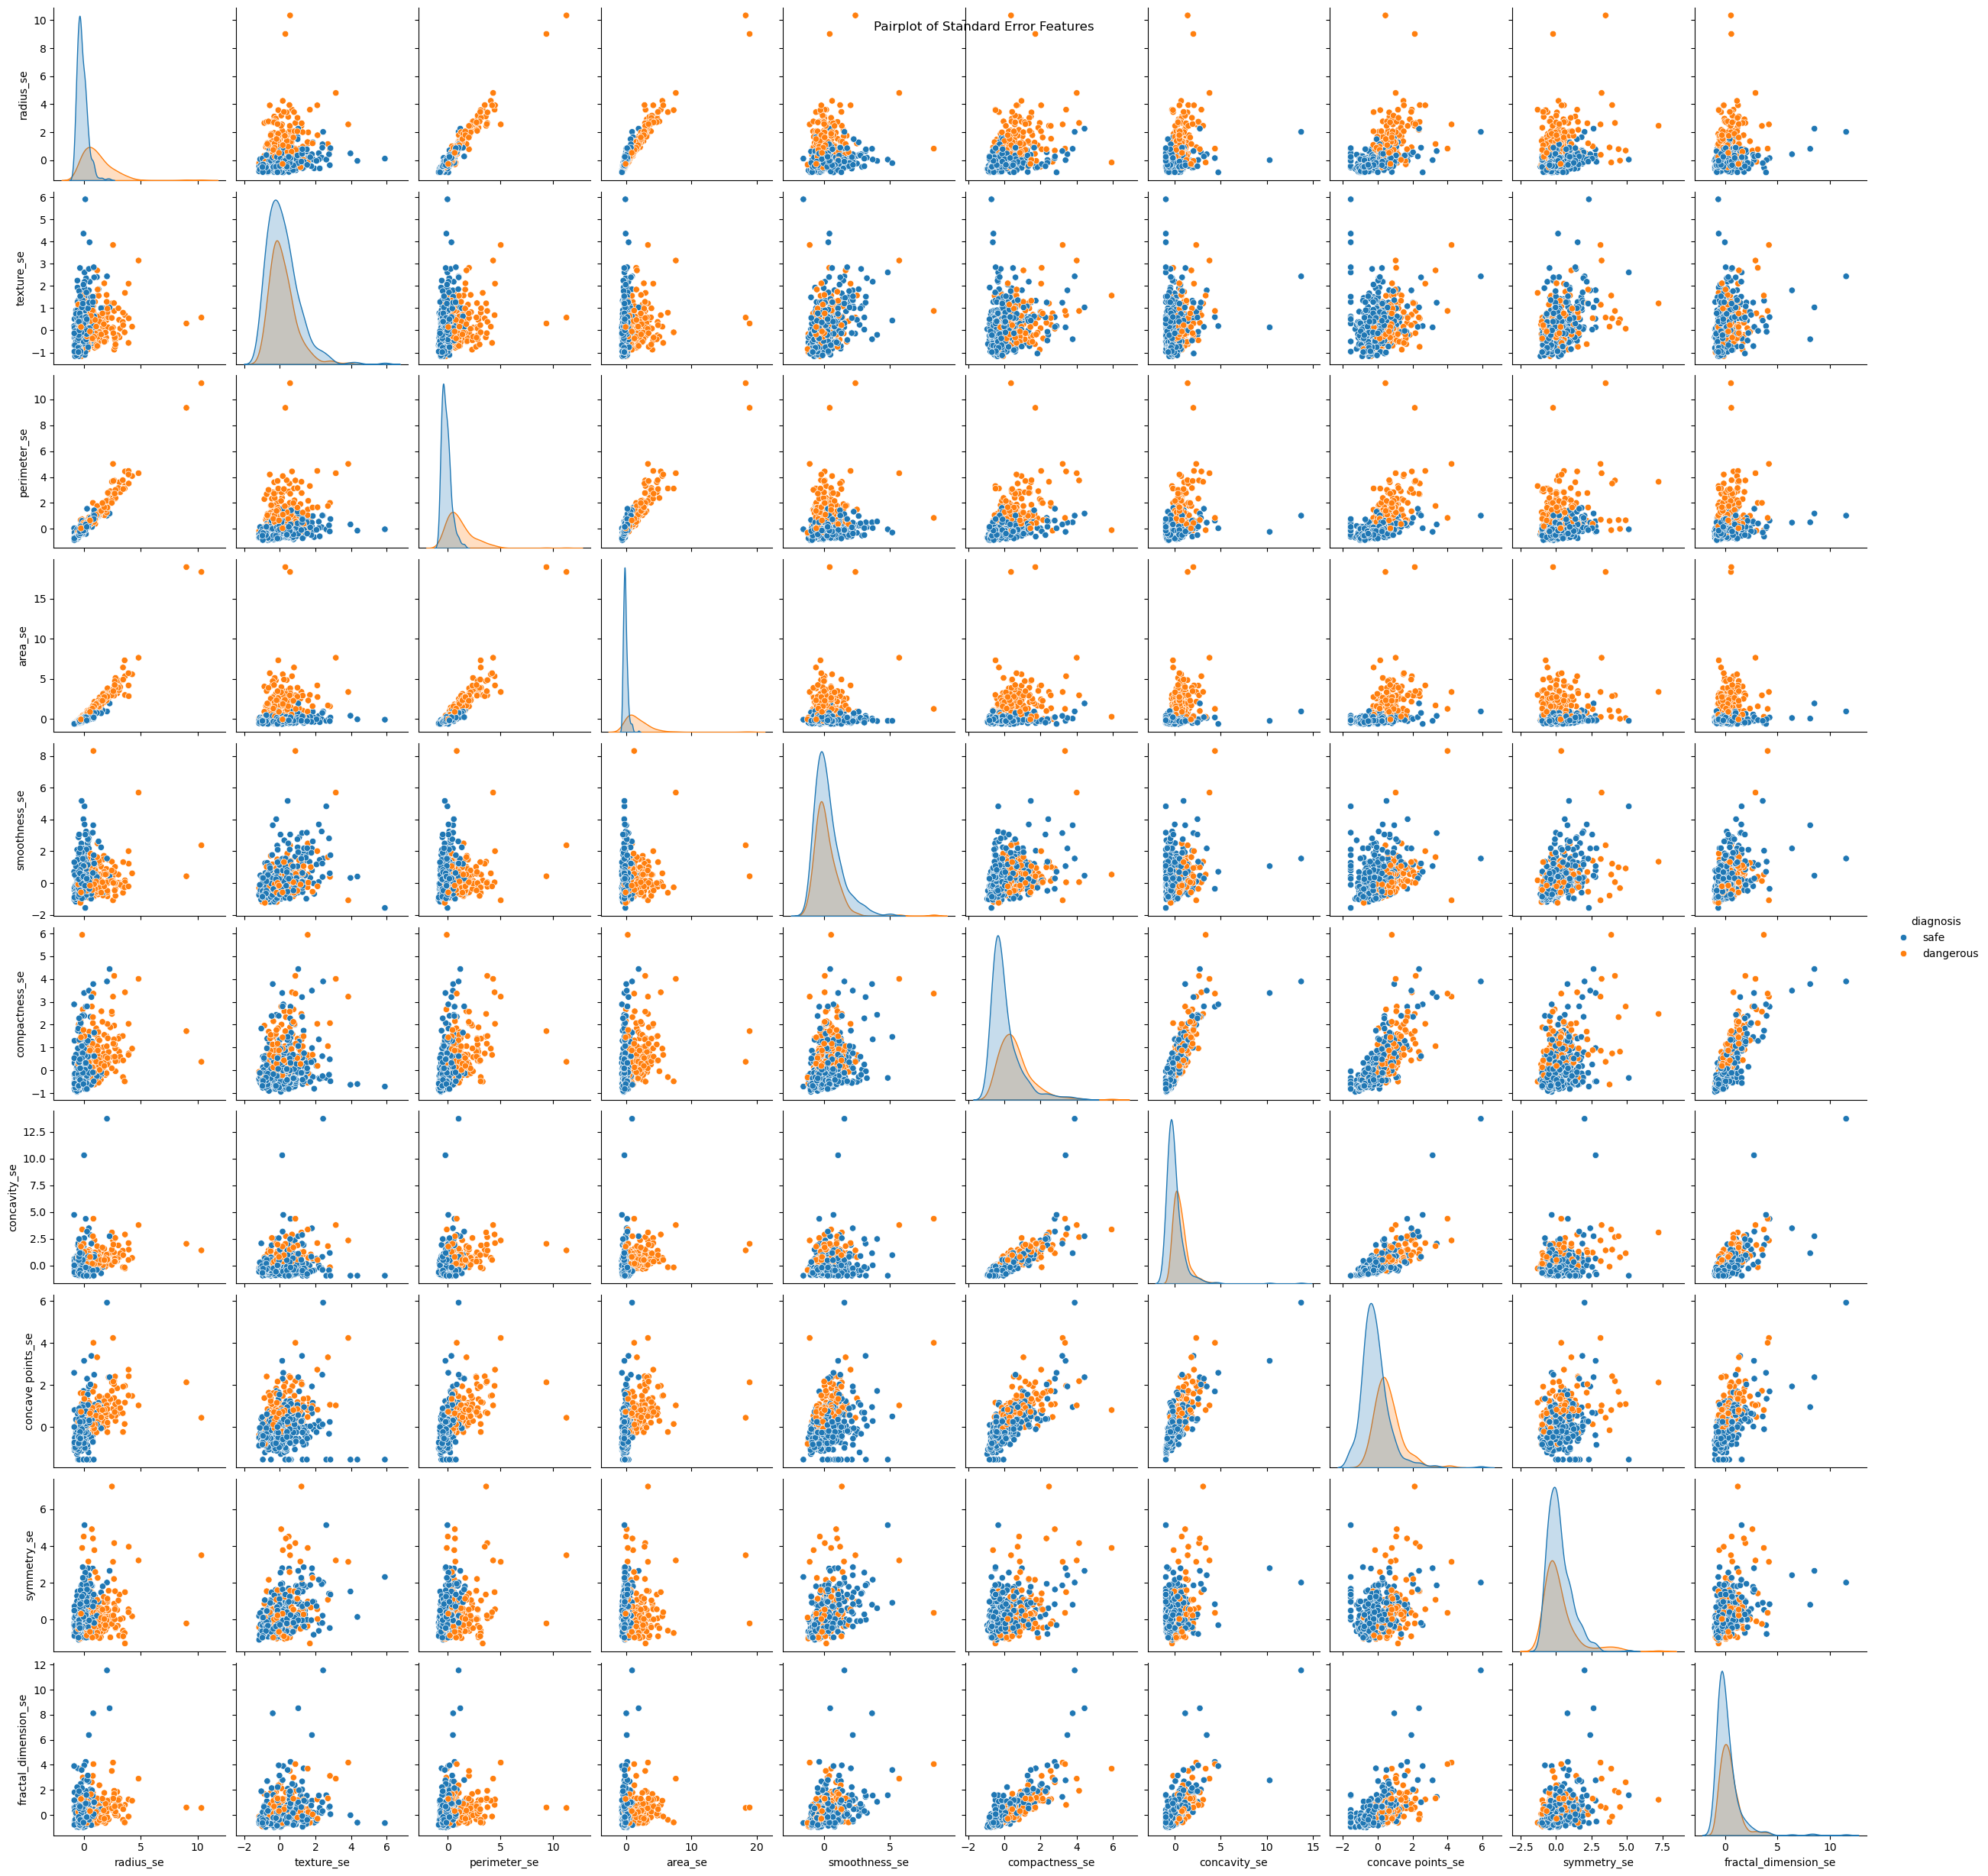

In [347]:
se_features = ['radius_se', 'texture_se', 'perimeter_se', 'area_se',
               'smoothness_se', 'compactness_se', 'concavity_se',
               'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'diagnosis']

sns.pairplot(df[se_features], hue='diagnosis')
plt.suptitle("Pairplot of Standard Error Features")
plt.show()


In [348]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'radius_mean_scaled'],
      dtype='object')

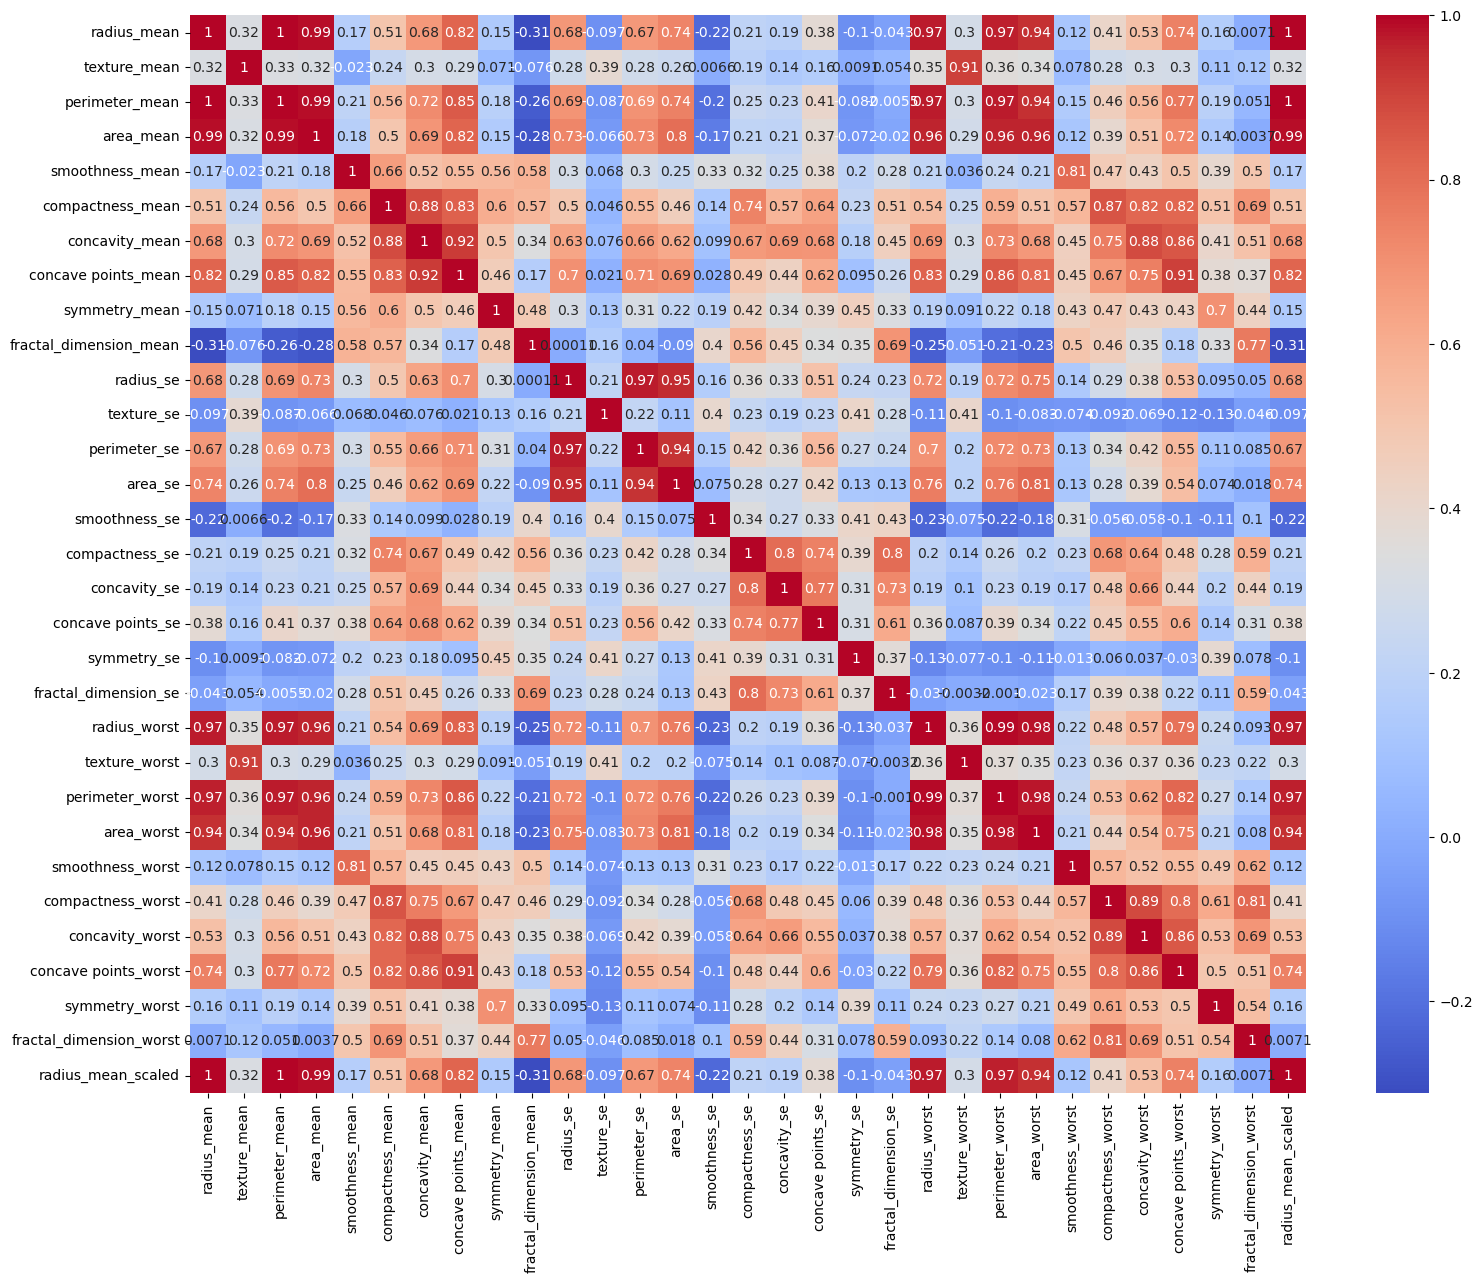

In [349]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(18,14))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

radius_mean and perimeter_mean  usually strongly correlated 1

radius_mean and area_mean strong relation 0.99

perimeter_mean and area_mean strong realtion 0.99

radius_wrost and perimeter_wrost has a strong relation 0.99


smoothness_mean and fractal_dimension_mean  typically weak correlation

concave points_wrost and smothness_mean typically weak relation

## KNN model 

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
x=df.drop(['diagnosis'],axis=1)

In [352]:
y=df['diagnosis']

In [353]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [354]:
x_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
259     0.529412      2.614565        0.603526   0.534768         0.550977   
219     1.509804      2.420959        1.443484   1.854029        -0.616482   
389     1.514706      0.776199        1.474594   1.718819         0.270998   
434     0.365196     -0.337478        0.298998   0.338300        -0.350238   
217    -0.776961     -0.241563       -0.732458  -0.634382        -0.809826   
..           ...           ...             ...        ...              ...   
14      0.088235      0.669627        0.254407   0.075055         0.910195   
419    -0.541667      0.456483       -0.528517  -0.471302         0.313259   
150    -0.090686      0.344583       -0.094366  -0.087472         0.931326   
169     0.392157     -0.335702        0.344971   0.371965         0.141574   
157     0.850490      0.110124        0.765987   0.908113        -1.131537   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
259          1.088424        1.122800             0.940399       0.884615   
219          0.311087        0.523631             0.612218      -1.076923   
389          0.598198        1.226617             1.277705       0.582840   
434         -0.334301       -0.277635            -0.088098      -0.647929   
217         -0.512523       -0.037572            -0.424474       0.508876   
..                ...             ...                  ...            ...   
14           2.087202        1.495551             0.870739       0.819527   
419         -0.501680       -0.519923            -0.423543      -0.523669   
150         -0.255651       -0.298398            -0.131309       2.213018   
169         -0.210446       -0.351196             0.080276      -0.035503   
157         -0.311546       -0.099268            -0.107841       0.153846   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
259                0.589074  ...       2.792824         0.693630    0.612801   
219               -0.998812  ...       2.314815         1.999031    3.148409   
389               -0.320665  ...       0.582176         1.073868    1.101635   
434               -0.535629  ...      -0.563657         0.112376    0.160014   
217                0.191211  ...      -0.108796        -0.539114   -0.497274   
..                      ...  ...            ...              ...         ...   
14                 1.814727  ...       0.763889         0.269799    0.019694   
419               -0.011876  ...       0.406250        -0.445628   -0.401794   
150               -0.079572  ...      -0.150463        -0.165658   -0.122736   
169               -0.598575  ...      -0.278935         0.168079    0.188500   
157               -1.052257  ...       0.307870         0.548317    0.607526   

     smoothness_worst  compactness_worst  concavity_worst  \
259          1.938776           1.795206         1.280179   
219          0.323129           1.030745         0.643815   
389         -0.210884           0.153726         0.581967   
434         -0.323129          -0.296509        -0.390089   
217         -1.225510          -0.376238        -0.127422   
..                ...                ...              ...   
14           1.149660           2.921313         1.742176   
419         -0.105442          -0.526837        -0.711177   
150         -0.054422          -0.528400        -0.542399   
169         -0.329932          -0.251172        -0.596945   
157         -1.481633          -0.213132        -0.143443   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
259              1.051830        1.022222                 1.957323   
219              0.648595       -0.161481                -0.211445   
389              0.855914       -0.364444                -0.194956   
434             -0.209599       -0.440000                -0.570805   
217             -0.665699        0.068148                -0.094568   
..                    ...    

In [355]:
x_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
192    -0.894608     -0.110124       -0.881784  -0.725717        -1.393027   
250     1.855392      0.838366        1.820256   2.243102         0.255151   
302     1.647059      0.891652        1.675078   1.920254         0.640782   
403    -0.105392     -0.474245       -0.105773  -0.120033         0.154253   
552    -0.147059      1.880995       -0.169029  -0.119205        -0.692552   
..           ...           ...             ...        ...              ...   
378     0.071078     -0.655417        0.070169   0.081402        -0.696778   
184     0.468137      0.634103        0.438299   0.440121        -0.279979   
225     0.237745     -0.953819        0.216730   0.248620         0.168516   
66     -0.957108      0.385435       -0.903215  -0.777318         0.450608   
545     0.061275      0.779751        0.032838   0.060982        -0.180137   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
192         -1.056659       -0.608464            -0.623952      -0.411243   
250          1.038027        2.072968             1.815981       1.221893   
302          1.392334        1.648804             1.760104       1.352071   
403         -0.065211       -0.282579            -0.178804      -0.168639   
552         -0.768021       -0.411014            -0.344757      -0.748521   
..                ...             ...                  ...            ...   
378         -0.261912       -0.188353            -0.163718       0.000000   
184          0.191967       -0.077022            -0.016204      -0.192308   
225         -0.250305       -0.042515             0.233377       0.837278   
66          -0.227550       -0.393712            -0.343826      -0.221893   
545         -0.384239       -0.314416            -0.168933      -0.378698   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
192                0.347981  ...      -0.530093        -0.857593   -0.672938   
250               -0.304038  ...       0.184028         1.638169    2.327238   
302                1.561758  ...       0.465278         1.480746    1.775101   
403                0.054632  ...      -0.276620        -0.193025   -0.185687   
552               -0.614014  ...       1.225694        -0.231533   -0.161421   
..                      ...  ...            ...              ...         ...   
378               -0.305226  ...      -0.667824         0.007266   -0.051873   
184                0.193587  ...       0.303241         0.390894    0.503956   
225               -0.838480  ...      -0.984954         0.308549    0.328293   
66                 0.884798  ...       0.711806        -0.741826   -0.625637   
545               -0.419240  ...       0.425926        -0.001938    0.076139   

     smoothness_worst  compactness_worst  concavity_worst  \
192         -2.045238          -0.962011        -0.844635   
250         -0.346939           0.548723         1.760060   
302          0.115646           0.662845         0.992921   
403         -0.479592          -0.083898        -0.170268   
552         -0.268707          -0.549766        -0.522243   
..                ...                ...              ...   
378         -0.129252           0.513288         0.112519   
184         -0.040816           0.614904         0.507824   
225         -0.054422          -0.309536        -0.236587   
66           0.799320          -0.237103        -0.493964   
545         -0.329932          -0.313705        -0.453800   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
192             -1.035866       -1.352593                -0.700776   
250              1.146159        0.450370                -0.075170   
302              0.957500        0.699259                 0.710475   
403             -0.166373        0.703704                -0.082444   
552             -0.362289       -0.614815                -0.737148   
..                    ...    

In [356]:
y_train

259    dangerous
219    dangerous
389    dangerous
434         safe
217         safe
         ...    
14     dangerous
419         safe
150         safe
169         safe
157         safe
Name: diagnosis, Length: 455, dtype: category
Categories (2, object): ['safe', 'dangerous']

In [357]:
y_test

192         safe
250    dangerous
302    dangerous
403         safe
552         safe
         ...    
378         safe
184    dangerous
225         safe
66          safe
545         safe
Name: diagnosis, Length: 114, dtype: category
Categories (2, object): ['safe', 'dangerous']

In [358]:
from sklearn.neighbors import KNeighborsClassifier

In [359]:
knn=KNeighborsClassifier()

In [360]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [361]:
knn.score(x_test,y_test)

0.9736842105263158

In [362]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')

In [363]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [365]:
knn.score(x_test,y_test)

0.956140350877193

In [366]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')

In [367]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [368]:
knn.fit(x_test,y_test)

KNeighborsClassifier(algorithm='ball_tree')

In [369]:
knn.score(x_test,y_test)

0.9649122807017544

# getting k values as from cross validiation

In [370]:
from sklearn.model_selection import cross_val_score

In [371]:
k_values=range(1,15)
cv_scores=[]


In [372]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
    cv_scores.append(np.mean(scores))

In [373]:
cv_scores  


[0.9507685142058687,
 0.9454432541530817,
 0.9577705325260053,
 0.9630802670392796,
 0.9630957925787922,
 0.9630802670392796,
 0.9648812296227295,
 0.9648812296227295,
 0.9648657040832168,
 0.9648657040832168,
 0.9631113181183046,
 0.9648657040832169,
 0.9631113181183046,
 0.9613569321533924]

In [374]:
cv_scores.index(max(cv_scores))

6

# Getting k value as from k-fold cross validation

In [375]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,weights='distance')

In [376]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [377]:
knn.score(x_test,y_test)

0.9736842105263158

In [378]:
# using algo with ball tree
knn=KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree',weights='distance')

In [379]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, weights='distance')

In [380]:
knn.score(x_test,y_test)

0.9736842105263158

In [381]:
# using algo eith kd_tree
knn=KNeighborsClassifier(n_neighbors=7,algorithm='kd_tree')

In [382]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7)

In [383]:
knn.score(x_test,y_test)

0.9736842105263158

# PCA

In [384]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'radius_mean_scaled'],
      dtype='object')

In [385]:
df1=df.drop('diagnosis',axis=1)

In [386]:
df1

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.132353     -1.502664        1.263740   1.241446         1.190174   
1       1.764706     -0.190053        1.612859   2.138245        -0.587956   
2       1.549020      0.428064        1.512617   1.798841         0.725304   
3      -0.477941      0.273535       -0.299343  -0.455298         2.463286   
4       1.696078     -0.799290        1.688904   2.058223         0.234020   
..           ...           ...             ...        ...              ...   
564     2.007353      0.630551        1.927411   2.560430         0.799260   
565     1.656863      1.671403        1.554096   1.958885         0.101955   
566     0.791667      1.641208        0.762530   0.847130        -0.597993   
567     1.772059      1.863233        1.861735   1.969923         1.158479   
568    -1.375000      1.012433       -1.324577  -1.021247        -2.284205   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            2.824832        2.358711             2.115850       1.855030   
1           -0.213653        0.250742             0.682995       0.059172   
2            1.027337        1.343287             1.758242       0.819527   
3            2.921045        1.778327             1.335444       2.381657   
4            0.613470        1.349219             1.318681       0.050296   
..                ...             ...                  ...            ...   
564          0.355376        1.803045             1.963122      -0.195266   
565          0.164478        0.815306             1.199665      -0.118343   
566          0.147679        0.306209             0.363569      -0.597633   
567          2.815669        2.865928             2.207115       1.789941   
568         -0.748473       -0.608464            -0.623952      -0.606509   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                  2.039192  ...      -0.935185         2.105595    2.343063   
1                 -0.578385  ...      -0.231481         1.480746    2.232284   
2                 -0.184086  ...       0.013889         1.328167    1.797960   
3                  4.263658  ...       0.126157         0.029305   -0.208897   
4                 -0.321853  ...      -1.011574         1.320901    1.562335   
..                      ...  ...            ...              ...         ...   
564               -0.630641  ...       0.114583         1.657544    2.357130   
565               -0.737530  ...       1.486111         1.388714    1.836645   
566               -0.600950  ...       1.008102         0.703318    0.769298   
567                1.023753  ...       1.621528         2.105595    1.994901   
568               -0.320665  ...       0.574074        -0.932429   -0.734834   

     smoothness_worst  compactness_worst  concavity_worst  \
0            1.051020           2.364252         1.807750   
1           -0.255102          -0.131839         0.055514   
2            0.445578           1.107869         0.833458   
3            2.670068           3.410109         1.714605   
4            0.207483          -0.035956         0.645678   
..                ...                ...              ...   
564          0.329932          -0.003127         0.685544   
565         -0.500000          -0.102658         0.353204   
566         -0.591837           0.508077         0.423249   
567          1.146259           3.419489         2.652757   
568         -1.406122          -0.768421        -0.844635   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                1.715248        2.635556                 1.884578   
1                0.892194       -0.106667                 0.435500   
2                1.483052        1.171852                 0.365664   
3                1.633358        5.653333                 4.508244   
4                0.648595       -0.678519                -0.158099   
..                    ...    

In [387]:
from sklearn.preprocessing import StandardScaler

In [388]:
scalar=StandardScaler()

In [389]:
scaled_data=scaler.fit_transform(df1)

In [390]:
scaled_data

array([[ 1.13235294, -1.5026643 ,  1.26374006, ...,  2.63555556,
         1.88457808,  1.13235294],
       [ 1.76470588, -0.19005329,  1.61285862, ..., -0.10666667,
         0.43549952,  1.76470588],
       [ 1.54901961,  0.42806394,  1.51261666, ...,  1.17185185,
         0.3656644 ,  1.54901961],
       ...,
       [ 0.79166667,  1.64120782,  0.76253025, ..., -0.89481481,
        -0.08923375,  0.79166667],
       [ 1.77205882,  1.86323268,  1.86173522, ...,  1.87407407,
         2.13191077,  1.77205882],
       [-1.375     ,  1.01243339, -1.32457656, ...,  0.07259259,
        -0.46799224, -1.375     ]])

In [391]:
from sklearn.decomposition import PCA

In [392]:
pca=PCA(n_components=2)

In [393]:
pca_data=pca.fit_transform(scaled_data)

In [394]:
pca_data

array([[ 8.73873216,  1.94416656],
       [ 2.92891291, -3.15433901],
       [ 5.34491601, -0.54635742],
       ...,
       [ 1.35229287, -1.194575  ],
       [ 8.3302853 ,  2.44063796],
       [-4.45273422, -0.86854636]])

In [395]:
pca.explained_variance_

array([12.12071743,  5.19309756])

In [396]:
pca_data.shape

(569, 2)

In [397]:
from sklearn.preprocessing import LabelEncoder

In [398]:
le=LabelEncoder()

In [399]:
color_label=le.fit_transform(df['diagnosis'])

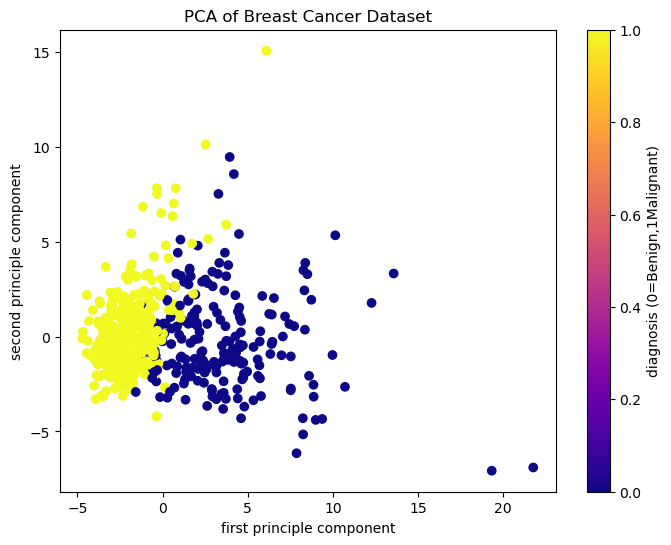

In [400]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=color_label,cmap='plasma')
plt.xlabel("first principle component")
plt.ylabel('second principle component')
plt.colorbar(label='diagnosis (0=Benign,1Malignant)')

plt.title('PCA of Breast Cancer Dataset')
plt.show()

#### There are some separation between Bengin and Malignant diagnoses
#### some overlap exists between the two classes

# t-sne

In [401]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)

In [402]:
tsne

TSNE()

In [403]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    dangerous     1.132353     -1.502664        1.263740   1.241446   
1    dangerous     1.764706     -0.190053        1.612859   2.138245   
2    dangerous     1.549020      0.428064        1.512617   1.798841   
3    dangerous    -0.477941      0.273535       -0.299343  -0.455298   
4    dangerous     1.696078     -0.799290        1.688904   2.058223   
..         ...          ...           ...             ...        ...   
564  dangerous     2.007353      0.630551        1.927411   2.560430   
565  dangerous     1.656863      1.671403        1.554096   1.958885   
566  dangerous     0.791667      1.641208        0.762530   0.847130   
567  dangerous     1.772059      1.863233        1.861735   1.969923   
568       safe    -1.375000      1.012433       -1.324577  -1.021247   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.190174          2.824832        2.358711             2.115850   
1          -0.587956         -0.213653        0.250742             0.682995   
2           0.725304          1.027337        1.343287             1.758242   
3           2.463286          2.921045        1.778327             1.335444   
4           0.234020          0.613470        1.349219             1.318681   
..               ...               ...             ...                  ...   
564         0.799260          0.355376        1.803045             1.963122   
565         0.101955          0.164478        0.815306             1.199665   
566        -0.597993          0.147679        0.306209             0.363569   
567         1.158479          2.815669        2.865928             2.207115   
568        -2.284205         -0.748473       -0.608464            -0.623952   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         1.855030  ...      -0.935185         2.105595    2.343063   
1         0.059172  ...      -0.231481         1.480746    2.232284   
2         0.819527  ...       0.013889         1.328167    1.797960   
3         2.381657  ...       0.126157         0.029305   -0.208897   
4         0.050296  ...      -1.011574         1.320901    1.562335   
..             ...  ...            ...              ...         ...   
564      -0.195266  ...       0.114583         1.657544    2.357130   
565      -0.118343  ...       1.486111         1.388714    1.836645   
566      -0.597633  ...       1.008102         0.703318    0.769298   
567       1.789941  ...       1.621528         2.105595    1.994901   
568      -0.606509  ...       0.574074        -0.932429   -0.734834   

     smoothness_worst  compactness_worst  concavity_worst  \
0            1.051020           2.364252         1.807750   
1           -0.255102          -0.131839         0.055514   
2            0.445578           1.107869         0.833458   
3            2.670068           3.410109         1.714605   
4            0.207483          -0.035956         0.645678   
..                ...                ...              ...   
564          0.329932          -0.003127         0.685544   
565         -0.500000          -0.102658         0.353204   
566         -0.591837           0.508077         0.423249   
567          1.146259           3.419489         2.652757   
568         -1.406122          -0.768421        -0.844635   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                1.715248        2.635556                 1.884578   
1                0.892194       -0.106667                 0.435500   
2                1.483052        1.171852                 0.365664   
3                1.633358        5.653333                 4.508244   
4                0.648595       -0.678519                -0.158099   
..                    ...             ...                      ...   
564              1.261221       -1.128889                -0.431135   
565              0.651705       -0.370370    

In [404]:
df2=df.drop('diagnosis',axis=1)

In [405]:
df2

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.132353     -1.502664        1.263740   1.241446         1.190174   
1       1.764706     -0.190053        1.612859   2.138245        -0.587956   
2       1.549020      0.428064        1.512617   1.798841         0.725304   
3      -0.477941      0.273535       -0.299343  -0.455298         2.463286   
4       1.696078     -0.799290        1.688904   2.058223         0.234020   
..           ...           ...             ...        ...              ...   
564     2.007353      0.630551        1.927411   2.560430         0.799260   
565     1.656863      1.671403        1.554096   1.958885         0.101955   
566     0.791667      1.641208        0.762530   0.847130        -0.597993   
567     1.772059      1.863233        1.861735   1.969923         1.158479   
568    -1.375000      1.012433       -1.324577  -1.021247        -2.284205   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            2.824832        2.358711             2.115850       1.855030   
1           -0.213653        0.250742             0.682995       0.059172   
2            1.027337        1.343287             1.758242       0.819527   
3            2.921045        1.778327             1.335444       2.381657   
4            0.613470        1.349219             1.318681       0.050296   
..                ...             ...                  ...            ...   
564          0.355376        1.803045             1.963122      -0.195266   
565          0.164478        0.815306             1.199665      -0.118343   
566          0.147679        0.306209             0.363569      -0.597633   
567          2.815669        2.865928             2.207115       1.789941   
568         -0.748473       -0.608464            -0.623952      -0.606509   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                  2.039192  ...      -0.935185         2.105595    2.343063   
1                 -0.578385  ...      -0.231481         1.480746    2.232284   
2                 -0.184086  ...       0.013889         1.328167    1.797960   
3                  4.263658  ...       0.126157         0.029305   -0.208897   
4                 -0.321853  ...      -1.011574         1.320901    1.562335   
..                      ...  ...            ...              ...         ...   
564               -0.630641  ...       0.114583         1.657544    2.357130   
565               -0.737530  ...       1.486111         1.388714    1.836645   
566               -0.600950  ...       1.008102         0.703318    0.769298   
567                1.023753  ...       1.621528         2.105595    1.994901   
568               -0.320665  ...       0.574074        -0.932429   -0.734834   

     smoothness_worst  compactness_worst  concavity_worst  \
0            1.051020           2.364252         1.807750   
1           -0.255102          -0.131839         0.055514   
2            0.445578           1.107869         0.833458   
3            2.670068           3.410109         1.714605   
4            0.207483          -0.035956         0.645678   
..                ...                ...              ...   
564          0.329932          -0.003127         0.685544   
565         -0.500000          -0.102658         0.353204   
566         -0.591837           0.508077         0.423249   
567          1.146259           3.419489         2.652757   
568         -1.406122          -0.768421        -0.844635   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                1.715248        2.635556                 1.884578   
1                0.892194       -0.106667                 0.435500   
2                1.483052        1.171852                 0.365664   
3                1.633358        5.653333                 4.508244   
4                0.648595       -0.678519                -0.158099   
..                    ...    

In [406]:
from sklearn.preprocessing import StandardScaler


In [407]:
scler=StandardScaler()

In [408]:
scaler

RobustScaler()

In [409]:
scaled_data=scaler.fit_transform(df2)

In [410]:
tsne_data=tsne.fit_transform(scaled_data)

In [411]:
tsne_data

array([[ 32.60714   ,  -5.385372  ],
       [ 20.016123  , -12.607138  ],
       [ 27.526968  ,  -7.9214196 ],
       ...,
       [ 19.52111   ,  -4.661489  ],
       [ 28.827734  ,  -3.9430084 ],
       [-24.199337  ,  -0.10887211]], dtype=float32)

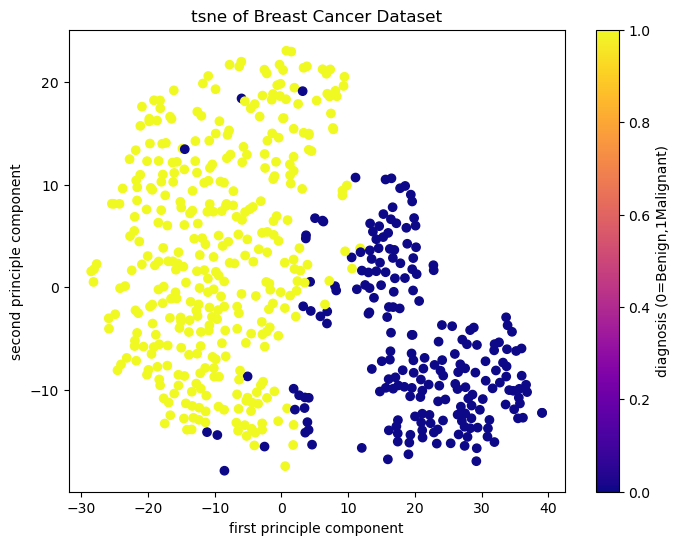

In [412]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=color_label,cmap='plasma')
plt.xlabel("first principle component")
plt.ylabel('second principle component')
plt.colorbar(label='diagnosis (0=Benign,1Malignant)')

plt.title('tsne of Breast Cancer Dataset')
plt.show()

In [416]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [417]:
x=df.drop('diagnosis',axis=1)

In [418]:
y=df['diagnosis']

In [420]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [421]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial')  
model.fit(x_train, y_train)



D:\shivanich\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [422]:
y_pred = model.predict(x_test)


In [423]:
y_pred

array(['safe', 'dangerous', 'dangerous', 'safe', 'safe', 'dangerous',
       'dangerous', 'dangerous', 'safe', 'safe', 'safe', 'dangerous',
       'safe', 'dangerous', 'safe', 'dangerous', 'safe', 'safe', 'safe',
       'dangerous', 'safe', 'safe', 'dangerous', 'safe', 'safe', 'safe',
       'safe', 'safe', 'safe', 'dangerous', 'safe', 'safe', 'safe',
       'safe', 'safe', 'safe', 'dangerous', 'safe', 'dangerous', 'safe',
       'safe', 'dangerous', 'safe', 'safe', 'safe', 'safe', 'safe',
       'safe', 'safe', 'safe', 'dangerous', 'dangerous', 'safe', 'safe',
       'safe', 'safe', 'safe', 'dangerous', 'dangerous', 'safe', 'safe',
       'dangerous', 'dangerous', 'safe', 'safe', 'safe', 'dangerous',
       'dangerous', 'safe', 'safe', 'dangerous', 'dangerous', 'safe',
       'dangerous', 'safe', 'safe', 'safe', 'dangerous', 'safe', 'safe',
       'dangerous', 'safe', 'dangerous', 'dangerous', 'dangerous',
       'dangerous', 'dangerous', 'dangerous', 'safe', 'safe', 'safe',
       's

In [424]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[42  1]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

   dangerous       0.98      0.98      0.98        43
        safe       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [467]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [468]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])  # safe=1, dangerous=0 or vice versa

X = df.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = df['diagnosis_encoded']


In [469]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [470]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [471]:
precision_score(y_test, y_pred)

0.958904109589041

In [472]:
recall_score(y_test, y_pred)

0.9859154929577465

In [473]:
confusion_matrix(y_test, y_pred)

array([[40,  3],
       [ 1, 70]], dtype=int64)

In [474]:
 recall_score(y_test, y_pred)

0.9859154929577465